In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

In [2]:
# 데이터 불러오기
df_train = pd.read_csv("src/data/train.csv") 
df_test = pd.read_csv("src/data/test.csv")

# 결측치 제거
df_train = df_train.dropna(axis=1)
df_test = df_test.dropna(axis=1)

# x와 y분류
x = df_train.drop(['ID', 'Y_LABEL'], axis=1)
y = df_train['Y_LABEL']

# test데이터에서 ID값 제거
df_test = df_test.drop(['ID'], axis = 1)

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2, stratify=y)

scaler = StandardScaler()
le = LabelEncoder()

# 변수 정규화
def get_values(value):
  return value.values.reshape(-1, 1)

categorical_features = ['COMPONENT_ARBITRARY','YEAR']
test_stage_features = ['COMPONENT_ARBITRARY', 'ANONYMOUS_1', 'YEAR' , 'ANONYMOUS_2', 'AG', 'CO', 'CR', 'CU', 'FE', 'H2O', 'MN', 'MO', 'NI', 'PQINDEX', 'TI', 'V', 'V40', 'ZN']

for col in x:
  if col not in categorical_features:
    x_train[col] = scaler.fit_transform(get_values(x_train[col]))
    x_valid[col] = scaler.transform(get_values(x_valid[col]))
    if col in df_test.columns:
        df_test[col] = scaler.transform(get_values(df_test[col]))

for col in categorical_features:
  x_train[col] = le.fit_transform(x_train[col])
  x_valid[col] = le.transform(x_valid[col])
  if col in df_test.columns:
      df_test[col] = le.transform(df_test[col])

In [3]:
# Xgboost 이진분류 모델 gridCV로 파라미터 튜닝
params = {'n_estimators': [100,200,400,600,800,1000],
        'max_depth' : [3,4,6,8,10,12],
        'eta' : [0.1], 
        'objective' : ['binary:logistic']}

model = XGBClassifier()
model_grid = GridSearchCV(model, param_grid=params, cv=3)
model_grid.fit(x_train, y_train, early_stopping_rounds=30, eval_metric='auc', eval_set = [(x_valid, y_valid)])

[0]	validation_0-auc:0.81069
[1]	validation_0-auc:0.81109
[2]	validation_0-auc:0.81111
[3]	validation_0-auc:0.82975
[4]	validation_0-auc:0.82978
[5]	validation_0-auc:0.82970
[6]	validation_0-auc:0.82977
[7]	validation_0-auc:0.82978
[8]	validation_0-auc:0.83150
[9]	validation_0-auc:0.84858
[10]	validation_0-auc:0.84823
[11]	validation_0-auc:0.84861
[12]	validation_0-auc:0.84977
[13]	validation_0-auc:0.85363
[14]	validation_0-auc:0.85335
[15]	validation_0-auc:0.85229
[16]	validation_0-auc:0.85247
[17]	validation_0-auc:0.85546
[18]	validation_0-auc:0.85720
[19]	validation_0-auc:0.86082
[20]	validation_0-auc:0.86285
[21]	validation_0-auc:0.86175
[22]	validation_0-auc:0.86240
[23]	validation_0-auc:0.86243
[24]	validation_0-auc:0.86351
[25]	validation_0-auc:0.86415
[26]	validation_0-auc:0.86205
[27]	validation_0-auc:0.86497
[28]	validation_0-auc:0.86600
[29]	validation_0-auc:0.86790
[30]	validation_0-auc:0.86819
[31]	validation_0-auc:0.87084
[32]	validation_0-auc:0.87098
[33]	validation_0-au

/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[48]	validation_0-auc:0.88416
[49]	validation_0-auc:0.88447
[50]	validation_0-auc:0.88449
[51]	validation_0-auc:0.88450
[52]	validation_0-auc:0.88484
[53]	validation_0-auc:0.88463
[54]	validation_0-auc:0.88420
[55]	validation_0-auc:0.88491
[56]	validation_0-auc:0.88519
[57]	validation_0-auc:0.88496
[58]	validation_0-auc:0.88527
[59]	validation_0-auc:0.88548
[60]	validation_0-auc:0.88579
[61]	validation_0-auc:0.88562
[62]	validation_0-auc:0.88570
[63]	validation_0-auc:0.88569
[64]	validation_0-auc:0.88566
[65]	validation_0-auc:0.88563
[66]	validation_0-auc:0.88581
[67]	validation_0-auc:0.88586
[68]	validation_0-auc:0.88556
[69]	validation_0-auc:0.88522
[70]	validation_0-auc:0.88529
[71]	validation_0-auc:0.88503
[72]	validation_0-auc:0.88507
[73]	validation_0-auc:0.88489
[74]	validation_0-auc:0.88497
[75]	validation_0-auc:0.88522
[76]	validation_0-auc:0.88505
[77]	validation_0-auc:0.88465
[78]	validation_0-auc:0.88466
[79]	validation_0-auc:0.88519
[80]	validation_0-auc:0.88521
[81]	valid

/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[45]	validation_0-auc:0.88012
[46]	validation_0-auc:0.87984
[47]	validation_0-auc:0.88120
[48]	validation_0-auc:0.88153
[49]	validation_0-auc:0.88174
[50]	validation_0-auc:0.88132
[51]	validation_0-auc:0.88129
[52]	validation_0-auc:0.88235
[53]	validation_0-auc:0.88271
[54]	validation_0-auc:0.88325
[55]	validation_0-auc:0.88289
[56]	validation_0-auc:0.88320
[57]	validation_0-auc:0.88249
[58]	validation_0-auc:0.88267
[59]	validation_0-auc:0.88192
[60]	validation_0-auc:0.88177
[61]	validation_0-auc:0.88235
[62]	validation_0-auc:0.88205
[63]	validation_0-auc:0.88222
[64]	validation_0-auc:0.88238
[65]	validation_0-auc:0.88220
[66]	validation_0-auc:0.88231
[67]	validation_0-auc:0.88292
[68]	validation_0-auc:0.88418
[69]	validation_0-auc:0.88391
[70]	validation_0-auc:0.88401
[71]	validation_0-auc:0.88417
[72]	validation_0-auc:0.88413
[73]	validation_0-auc:0.88416
[74]	validation_0-auc:0.88390
[75]	validation_0-auc:0.88406
[76]	validation_0-auc:0.88386
[77]	validation_0-auc:0.88383
[78]	valid

/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[37]	validation_0-auc:0.87675
[38]	validation_0-auc:0.87691
[39]	validation_0-auc:0.87699
[40]	validation_0-auc:0.87717
[41]	validation_0-auc:0.87671
[42]	validation_0-auc:0.87719
[43]	validation_0-auc:0.87815
[44]	validation_0-auc:0.87893
[45]	validation_0-auc:0.87912
[46]	validation_0-auc:0.87947
[47]	validation_0-auc:0.87973
[48]	validation_0-auc:0.87980
[49]	validation_0-auc:0.88047
[50]	validation_0-auc:0.88047
[51]	validation_0-auc:0.88139
[52]	validation_0-auc:0.88312
[53]	validation_0-auc:0.88298
[54]	validation_0-auc:0.88265
[55]	validation_0-auc:0.88275
[56]	validation_0-auc:0.88266
[57]	validation_0-auc:0.88356
[58]	validation_0-auc:0.88394
[59]	validation_0-auc:0.88347
[60]	validation_0-auc:0.88372
[61]	validation_0-auc:0.88401
[62]	validation_0-auc:0.88406
[63]	validation_0-auc:0.88429
[64]	validation_0-auc:0.88505
[65]	validation_0-auc:0.88448
[66]	validation_0-auc:0.88442
[67]	validation_0-auc:0.88425
[68]	validation_0-auc:0.88481
[69]	validation_0-auc:0.88484
[70]	valid

/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[48]	validation_0-auc:0.88416
[49]	validation_0-auc:0.88447
[50]	validation_0-auc:0.88449
[51]	validation_0-auc:0.88450
[52]	validation_0-auc:0.88484
[53]	validation_0-auc:0.88463
[54]	validation_0-auc:0.88420
[55]	validation_0-auc:0.88491
[56]	validation_0-auc:0.88519
[57]	validation_0-auc:0.88496
[58]	validation_0-auc:0.88527
[59]	validation_0-auc:0.88548
[60]	validation_0-auc:0.88579
[61]	validation_0-auc:0.88562
[62]	validation_0-auc:0.88570
[63]	validation_0-auc:0.88569
[64]	validation_0-auc:0.88566
[65]	validation_0-auc:0.88563
[66]	validation_0-auc:0.88581
[67]	validation_0-auc:0.88586
[68]	validation_0-auc:0.88556
[69]	validation_0-auc:0.88522
[70]	validation_0-auc:0.88529
[71]	validation_0-auc:0.88503
[72]	validation_0-auc:0.88507
[73]	validation_0-auc:0.88489
[74]	validation_0-auc:0.88497
[75]	validation_0-auc:0.88522
[76]	validation_0-auc:0.88505
[77]	validation_0-auc:0.88465
[78]	validation_0-auc:0.88466
[79]	validation_0-auc:0.88519
[80]	validation_0-auc:0.88521
[81]	valid

/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[42]	validation_0-auc:0.87904
[43]	validation_0-auc:0.87868
[44]	validation_0-auc:0.87926
[45]	validation_0-auc:0.88012
[46]	validation_0-auc:0.87984
[47]	validation_0-auc:0.88120
[48]	validation_0-auc:0.88153
[49]	validation_0-auc:0.88174
[50]	validation_0-auc:0.88132
[51]	validation_0-auc:0.88129
[52]	validation_0-auc:0.88235
[53]	validation_0-auc:0.88271
[54]	validation_0-auc:0.88325
[55]	validation_0-auc:0.88289
[56]	validation_0-auc:0.88320
[57]	validation_0-auc:0.88249
[58]	validation_0-auc:0.88267
[59]	validation_0-auc:0.88192
[60]	validation_0-auc:0.88177
[61]	validation_0-auc:0.88235
[62]	validation_0-auc:0.88205
[63]	validation_0-auc:0.88222
[64]	validation_0-auc:0.88238
[65]	validation_0-auc:0.88220
[66]	validation_0-auc:0.88231
[67]	validation_0-auc:0.88292
[68]	validation_0-auc:0.88418
[69]	validation_0-auc:0.88391
[70]	validation_0-auc:0.88401
[71]	validation_0-auc:0.88417
[72]	validation_0-auc:0.88413
[73]	validation_0-auc:0.88416
[74]	validation_0-auc:0.88390
[75]	valid

/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[39]	validation_0-auc:0.87699
[40]	validation_0-auc:0.87717
[41]	validation_0-auc:0.87671
[42]	validation_0-auc:0.87719
[43]	validation_0-auc:0.87815
[44]	validation_0-auc:0.87893
[45]	validation_0-auc:0.87912
[46]	validation_0-auc:0.87947
[47]	validation_0-auc:0.87973
[48]	validation_0-auc:0.87980
[49]	validation_0-auc:0.88047
[50]	validation_0-auc:0.88047
[51]	validation_0-auc:0.88139
[52]	validation_0-auc:0.88312
[53]	validation_0-auc:0.88298
[54]	validation_0-auc:0.88265
[55]	validation_0-auc:0.88275
[56]	validation_0-auc:0.88266
[57]	validation_0-auc:0.88356
[58]	validation_0-auc:0.88394
[59]	validation_0-auc:0.88347
[60]	validation_0-auc:0.88372
[61]	validation_0-auc:0.88401
[62]	validation_0-auc:0.88406
[63]	validation_0-auc:0.88429
[64]	validation_0-auc:0.88505
[65]	validation_0-auc:0.88448
[66]	validation_0-auc:0.88442
[67]	validation_0-auc:0.88425
[68]	validation_0-auc:0.88481
[69]	validation_0-auc:0.88484
[70]	validation_0-auc:0.88481
[71]	validation_0-auc:0.88505
[72]	valid

/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[48]	validation_0-auc:0.88416
[49]	validation_0-auc:0.88447
[50]	validation_0-auc:0.88449
[51]	validation_0-auc:0.88450
[52]	validation_0-auc:0.88484
[53]	validation_0-auc:0.88463
[54]	validation_0-auc:0.88420
[55]	validation_0-auc:0.88491
[56]	validation_0-auc:0.88519
[57]	validation_0-auc:0.88496
[58]	validation_0-auc:0.88527
[59]	validation_0-auc:0.88548
[60]	validation_0-auc:0.88579
[61]	validation_0-auc:0.88562
[62]	validation_0-auc:0.88570
[63]	validation_0-auc:0.88569
[64]	validation_0-auc:0.88566
[65]	validation_0-auc:0.88563
[66]	validation_0-auc:0.88581
[67]	validation_0-auc:0.88586
[68]	validation_0-auc:0.88556
[69]	validation_0-auc:0.88522
[70]	validation_0-auc:0.88529
[71]	validation_0-auc:0.88503
[72]	validation_0-auc:0.88507
[73]	validation_0-auc:0.88489
[74]	validation_0-auc:0.88497
[75]	validation_0-auc:0.88522
[76]	validation_0-auc:0.88505
[77]	validation_0-auc:0.88465
[78]	validation_0-auc:0.88466
[79]	validation_0-auc:0.88519
[80]	validation_0-auc:0.88521
[81]	valid

/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[55]	validation_0-auc:0.88289
[56]	validation_0-auc:0.88320
[57]	validation_0-auc:0.88249
[58]	validation_0-auc:0.88267
[59]	validation_0-auc:0.88192
[60]	validation_0-auc:0.88177
[61]	validation_0-auc:0.88235
[62]	validation_0-auc:0.88205
[63]	validation_0-auc:0.88222
[64]	validation_0-auc:0.88238
[65]	validation_0-auc:0.88220
[66]	validation_0-auc:0.88231
[67]	validation_0-auc:0.88292
[68]	validation_0-auc:0.88418
[69]	validation_0-auc:0.88391
[70]	validation_0-auc:0.88401
[71]	validation_0-auc:0.88417
[72]	validation_0-auc:0.88413
[73]	validation_0-auc:0.88416
[74]	validation_0-auc:0.88390
[75]	validation_0-auc:0.88406
[76]	validation_0-auc:0.88386
[77]	validation_0-auc:0.88383
[78]	validation_0-auc:0.88433
[79]	validation_0-auc:0.88464
[80]	validation_0-auc:0.88398
[81]	validation_0-auc:0.88447
[82]	validation_0-auc:0.88412
[83]	validation_0-auc:0.88429
[84]	validation_0-auc:0.88429
[85]	validation_0-auc:0.88608
[86]	validation_0-auc:0.88612
[87]	validation_0-auc:0.88613
[88]	valid

/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[50]	validation_0-auc:0.88047
[51]	validation_0-auc:0.88139
[52]	validation_0-auc:0.88312
[53]	validation_0-auc:0.88298
[54]	validation_0-auc:0.88265
[55]	validation_0-auc:0.88275
[56]	validation_0-auc:0.88266
[57]	validation_0-auc:0.88356
[58]	validation_0-auc:0.88394
[59]	validation_0-auc:0.88347
[60]	validation_0-auc:0.88372
[61]	validation_0-auc:0.88401
[62]	validation_0-auc:0.88406
[63]	validation_0-auc:0.88429
[64]	validation_0-auc:0.88505
[65]	validation_0-auc:0.88448
[66]	validation_0-auc:0.88442
[67]	validation_0-auc:0.88425
[68]	validation_0-auc:0.88481
[69]	validation_0-auc:0.88484
[70]	validation_0-auc:0.88481
[71]	validation_0-auc:0.88505
[72]	validation_0-auc:0.88517
[73]	validation_0-auc:0.88472
[74]	validation_0-auc:0.88473
[75]	validation_0-auc:0.88488
[76]	validation_0-auc:0.88483
[77]	validation_0-auc:0.88463
[78]	validation_0-auc:0.88420
[79]	validation_0-auc:0.88435
[80]	validation_0-auc:0.88490
[81]	validation_0-auc:0.88451
[82]	validation_0-auc:0.88469
[83]	valid

/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[60]	validation_0-auc:0.88579
[61]	validation_0-auc:0.88562
[62]	validation_0-auc:0.88570
[63]	validation_0-auc:0.88569
[64]	validation_0-auc:0.88566
[65]	validation_0-auc:0.88563
[66]	validation_0-auc:0.88581
[67]	validation_0-auc:0.88586
[68]	validation_0-auc:0.88556
[69]	validation_0-auc:0.88522
[70]	validation_0-auc:0.88529
[71]	validation_0-auc:0.88503
[72]	validation_0-auc:0.88507
[73]	validation_0-auc:0.88489
[74]	validation_0-auc:0.88497
[75]	validation_0-auc:0.88522
[76]	validation_0-auc:0.88505
[77]	validation_0-auc:0.88465
[78]	validation_0-auc:0.88466
[79]	validation_0-auc:0.88519
[80]	validation_0-auc:0.88521
[81]	validation_0-auc:0.88545
[82]	validation_0-auc:0.88477
[83]	validation_0-auc:0.88522
[84]	validation_0-auc:0.88541
[85]	validation_0-auc:0.88547
[86]	validation_0-auc:0.88542
[87]	validation_0-auc:0.88529
[88]	validation_0-auc:0.88525
[89]	validation_0-auc:0.88520
[90]	validation_0-auc:0.88524
[91]	validation_0-auc:0.88511
[92]	validation_0-auc:0.88529
[93]	valid

/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[59]	validation_0-auc:0.88192
[60]	validation_0-auc:0.88177
[61]	validation_0-auc:0.88235
[62]	validation_0-auc:0.88205
[63]	validation_0-auc:0.88222
[64]	validation_0-auc:0.88238
[65]	validation_0-auc:0.88220
[66]	validation_0-auc:0.88231
[67]	validation_0-auc:0.88292
[68]	validation_0-auc:0.88418
[69]	validation_0-auc:0.88391
[70]	validation_0-auc:0.88401
[71]	validation_0-auc:0.88417
[72]	validation_0-auc:0.88413
[73]	validation_0-auc:0.88416
[74]	validation_0-auc:0.88390
[75]	validation_0-auc:0.88406
[76]	validation_0-auc:0.88386
[77]	validation_0-auc:0.88383
[78]	validation_0-auc:0.88433
[79]	validation_0-auc:0.88464
[80]	validation_0-auc:0.88398
[81]	validation_0-auc:0.88447
[82]	validation_0-auc:0.88412
[83]	validation_0-auc:0.88429
[84]	validation_0-auc:0.88429
[85]	validation_0-auc:0.88608
[86]	validation_0-auc:0.88612
[87]	validation_0-auc:0.88613
[88]	validation_0-auc:0.88611
[89]	validation_0-auc:0.88610
[90]	validation_0-auc:0.88590
[91]	validation_0-auc:0.88575
[92]	valid

/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[57]	validation_0-auc:0.88356
[58]	validation_0-auc:0.88394
[59]	validation_0-auc:0.88347
[60]	validation_0-auc:0.88372
[61]	validation_0-auc:0.88401
[62]	validation_0-auc:0.88406
[63]	validation_0-auc:0.88429
[64]	validation_0-auc:0.88505
[65]	validation_0-auc:0.88448
[66]	validation_0-auc:0.88442
[67]	validation_0-auc:0.88425
[68]	validation_0-auc:0.88481
[69]	validation_0-auc:0.88484
[70]	validation_0-auc:0.88481
[71]	validation_0-auc:0.88505
[72]	validation_0-auc:0.88517
[73]	validation_0-auc:0.88472
[74]	validation_0-auc:0.88473
[75]	validation_0-auc:0.88488
[76]	validation_0-auc:0.88483
[77]	validation_0-auc:0.88463
[78]	validation_0-auc:0.88420
[79]	validation_0-auc:0.88435
[80]	validation_0-auc:0.88490
[81]	validation_0-auc:0.88451
[82]	validation_0-auc:0.88469
[83]	validation_0-auc:0.88474
[84]	validation_0-auc:0.88476
[85]	validation_0-auc:0.88442
[86]	validation_0-auc:0.88424
[87]	validation_0-auc:0.88431
[88]	validation_0-auc:0.88444
[89]	validation_0-auc:0.88387
[90]	valid

/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[59]	validation_0-auc:0.88548
[60]	validation_0-auc:0.88579
[61]	validation_0-auc:0.88562
[62]	validation_0-auc:0.88570
[63]	validation_0-auc:0.88569
[64]	validation_0-auc:0.88566
[65]	validation_0-auc:0.88563
[66]	validation_0-auc:0.88581
[67]	validation_0-auc:0.88586
[68]	validation_0-auc:0.88556
[69]	validation_0-auc:0.88522
[70]	validation_0-auc:0.88529
[71]	validation_0-auc:0.88503
[72]	validation_0-auc:0.88507
[73]	validation_0-auc:0.88489
[74]	validation_0-auc:0.88497
[75]	validation_0-auc:0.88522
[76]	validation_0-auc:0.88505
[77]	validation_0-auc:0.88465
[78]	validation_0-auc:0.88466
[79]	validation_0-auc:0.88519
[80]	validation_0-auc:0.88521
[81]	validation_0-auc:0.88545
[82]	validation_0-auc:0.88477
[83]	validation_0-auc:0.88522
[84]	validation_0-auc:0.88541
[85]	validation_0-auc:0.88547
[86]	validation_0-auc:0.88542
[87]	validation_0-auc:0.88529
[88]	validation_0-auc:0.88525
[89]	validation_0-auc:0.88520
[90]	validation_0-auc:0.88524
[91]	validation_0-auc:0.88511
[92]	valid

/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[58]	validation_0-auc:0.88267
[59]	validation_0-auc:0.88192
[60]	validation_0-auc:0.88177
[61]	validation_0-auc:0.88235
[62]	validation_0-auc:0.88205
[63]	validation_0-auc:0.88222
[64]	validation_0-auc:0.88238
[65]	validation_0-auc:0.88220
[66]	validation_0-auc:0.88231
[67]	validation_0-auc:0.88292
[68]	validation_0-auc:0.88418
[69]	validation_0-auc:0.88391
[70]	validation_0-auc:0.88401
[71]	validation_0-auc:0.88417
[72]	validation_0-auc:0.88413
[73]	validation_0-auc:0.88416
[74]	validation_0-auc:0.88390
[75]	validation_0-auc:0.88406
[76]	validation_0-auc:0.88386
[77]	validation_0-auc:0.88383
[78]	validation_0-auc:0.88433
[79]	validation_0-auc:0.88464
[80]	validation_0-auc:0.88398
[81]	validation_0-auc:0.88447
[82]	validation_0-auc:0.88412
[83]	validation_0-auc:0.88429
[84]	validation_0-auc:0.88429
[85]	validation_0-auc:0.88608
[86]	validation_0-auc:0.88612
[87]	validation_0-auc:0.88613
[88]	validation_0-auc:0.88611
[89]	validation_0-auc:0.88610
[90]	validation_0-auc:0.88590
[91]	valid

/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[59]	validation_0-auc:0.88347
[60]	validation_0-auc:0.88372
[61]	validation_0-auc:0.88401
[62]	validation_0-auc:0.88406
[63]	validation_0-auc:0.88429
[64]	validation_0-auc:0.88505
[65]	validation_0-auc:0.88448
[66]	validation_0-auc:0.88442
[67]	validation_0-auc:0.88425
[68]	validation_0-auc:0.88481
[69]	validation_0-auc:0.88484
[70]	validation_0-auc:0.88481
[71]	validation_0-auc:0.88505
[72]	validation_0-auc:0.88517
[73]	validation_0-auc:0.88472
[74]	validation_0-auc:0.88473
[75]	validation_0-auc:0.88488
[76]	validation_0-auc:0.88483
[77]	validation_0-auc:0.88463
[78]	validation_0-auc:0.88420
[79]	validation_0-auc:0.88435
[80]	validation_0-auc:0.88490
[81]	validation_0-auc:0.88451
[82]	validation_0-auc:0.88469
[83]	validation_0-auc:0.88474
[84]	validation_0-auc:0.88476
[85]	validation_0-auc:0.88442
[86]	validation_0-auc:0.88424
[87]	validation_0-auc:0.88431
[88]	validation_0-auc:0.88444
[89]	validation_0-auc:0.88387
[90]	validation_0-auc:0.88370
[91]	validation_0-auc:0.88320
[92]	valid

/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[57]	validation_0-auc:0.88496
[58]	validation_0-auc:0.88527
[59]	validation_0-auc:0.88548
[60]	validation_0-auc:0.88579
[61]	validation_0-auc:0.88562
[62]	validation_0-auc:0.88570
[63]	validation_0-auc:0.88569
[64]	validation_0-auc:0.88566
[65]	validation_0-auc:0.88563
[66]	validation_0-auc:0.88581
[67]	validation_0-auc:0.88586
[68]	validation_0-auc:0.88556
[69]	validation_0-auc:0.88522
[70]	validation_0-auc:0.88529
[71]	validation_0-auc:0.88503
[72]	validation_0-auc:0.88507
[73]	validation_0-auc:0.88489
[74]	validation_0-auc:0.88497
[75]	validation_0-auc:0.88522
[76]	validation_0-auc:0.88505
[77]	validation_0-auc:0.88465
[78]	validation_0-auc:0.88466
[79]	validation_0-auc:0.88519
[80]	validation_0-auc:0.88521
[81]	validation_0-auc:0.88545
[82]	validation_0-auc:0.88477
[83]	validation_0-auc:0.88522
[84]	validation_0-auc:0.88541
[85]	validation_0-auc:0.88547
[86]	validation_0-auc:0.88542
[87]	validation_0-auc:0.88529
[88]	validation_0-auc:0.88525
[89]	validation_0-auc:0.88520
[90]	valid

/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[58]	validation_0-auc:0.88267
[59]	validation_0-auc:0.88192
[60]	validation_0-auc:0.88177
[61]	validation_0-auc:0.88235
[62]	validation_0-auc:0.88205
[63]	validation_0-auc:0.88222
[64]	validation_0-auc:0.88238
[65]	validation_0-auc:0.88220
[66]	validation_0-auc:0.88231
[67]	validation_0-auc:0.88292
[68]	validation_0-auc:0.88418
[69]	validation_0-auc:0.88391
[70]	validation_0-auc:0.88401
[71]	validation_0-auc:0.88417
[72]	validation_0-auc:0.88413
[73]	validation_0-auc:0.88416
[74]	validation_0-auc:0.88390
[75]	validation_0-auc:0.88406
[76]	validation_0-auc:0.88386
[77]	validation_0-auc:0.88383
[78]	validation_0-auc:0.88433
[79]	validation_0-auc:0.88464
[80]	validation_0-auc:0.88398
[81]	validation_0-auc:0.88447
[82]	validation_0-auc:0.88412
[83]	validation_0-auc:0.88429
[84]	validation_0-auc:0.88429
[85]	validation_0-auc:0.88608
[86]	validation_0-auc:0.88612
[87]	validation_0-auc:0.88613
[88]	validation_0-auc:0.88611
[89]	validation_0-auc:0.88610
[90]	validation_0-auc:0.88590
[91]	valid

/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[58]	validation_0-auc:0.88394
[59]	validation_0-auc:0.88347
[60]	validation_0-auc:0.88372
[61]	validation_0-auc:0.88401
[62]	validation_0-auc:0.88406
[63]	validation_0-auc:0.88429
[64]	validation_0-auc:0.88505
[65]	validation_0-auc:0.88448
[66]	validation_0-auc:0.88442
[67]	validation_0-auc:0.88425
[68]	validation_0-auc:0.88481
[69]	validation_0-auc:0.88484
[70]	validation_0-auc:0.88481
[71]	validation_0-auc:0.88505
[72]	validation_0-auc:0.88517
[73]	validation_0-auc:0.88472
[74]	validation_0-auc:0.88473
[75]	validation_0-auc:0.88488
[76]	validation_0-auc:0.88483
[77]	validation_0-auc:0.88463
[78]	validation_0-auc:0.88420
[79]	validation_0-auc:0.88435
[80]	validation_0-auc:0.88490
[81]	validation_0-auc:0.88451
[82]	validation_0-auc:0.88469
[83]	validation_0-auc:0.88474
[84]	validation_0-auc:0.88476
[85]	validation_0-auc:0.88442
[86]	validation_0-auc:0.88424
[87]	validation_0-auc:0.88431
[88]	validation_0-auc:0.88444
[89]	validation_0-auc:0.88387
[90]	validation_0-auc:0.88370
[91]	valid

/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[44]	validation_0-auc:0.88580
[45]	validation_0-auc:0.88557
[46]	validation_0-auc:0.88612
[47]	validation_0-auc:0.88719
[48]	validation_0-auc:0.88740
[49]	validation_0-auc:0.88661
[50]	validation_0-auc:0.88695
[51]	validation_0-auc:0.88682
[52]	validation_0-auc:0.88786
[53]	validation_0-auc:0.88728
[54]	validation_0-auc:0.88719
[55]	validation_0-auc:0.88671
[56]	validation_0-auc:0.88624
[57]	validation_0-auc:0.88654
[58]	validation_0-auc:0.88628
[59]	validation_0-auc:0.88718
[60]	validation_0-auc:0.88799
[61]	validation_0-auc:0.88853
[62]	validation_0-auc:0.88881
[63]	validation_0-auc:0.88872
[64]	validation_0-auc:0.88876
[65]	validation_0-auc:0.88926
[66]	validation_0-auc:0.88948
[67]	validation_0-auc:0.88922
[68]	validation_0-auc:0.88897
[69]	validation_0-auc:0.88921
[70]	validation_0-auc:0.88973
[71]	validation_0-auc:0.88953
[72]	validation_0-auc:0.88927
[73]	validation_0-auc:0.88885
[74]	validation_0-auc:0.88885
[75]	validation_0-auc:0.88891
[76]	validation_0-auc:0.88962
[77]	valid

/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[46]	validation_0-auc:0.88670
[47]	validation_0-auc:0.88752
[48]	validation_0-auc:0.88825
[49]	validation_0-auc:0.88836
[50]	validation_0-auc:0.88808
[51]	validation_0-auc:0.88849
[52]	validation_0-auc:0.88881
[53]	validation_0-auc:0.88906
[54]	validation_0-auc:0.88953
[55]	validation_0-auc:0.88933
[56]	validation_0-auc:0.88898
[57]	validation_0-auc:0.88909
[58]	validation_0-auc:0.88911
[59]	validation_0-auc:0.88896
[60]	validation_0-auc:0.88861
[61]	validation_0-auc:0.88851
[62]	validation_0-auc:0.88878
[63]	validation_0-auc:0.88884
[64]	validation_0-auc:0.88872
[65]	validation_0-auc:0.88895
[66]	validation_0-auc:0.88894
[67]	validation_0-auc:0.88882
[68]	validation_0-auc:0.88922
[69]	validation_0-auc:0.88967
[70]	validation_0-auc:0.88927
[71]	validation_0-auc:0.88914
[72]	validation_0-auc:0.88885
[73]	validation_0-auc:0.88874
[74]	validation_0-auc:0.88884
[75]	validation_0-auc:0.88851
[76]	validation_0-auc:0.88831
[77]	validation_0-auc:0.88799
[78]	validation_0-auc:0.88832
[79]	valid

/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[45]	validation_0-auc:0.88618
[46]	validation_0-auc:0.88593
[47]	validation_0-auc:0.88570
[48]	validation_0-auc:0.88558
[49]	validation_0-auc:0.88556
[50]	validation_0-auc:0.88583
[51]	validation_0-auc:0.88572
[52]	validation_0-auc:0.88597
[53]	validation_0-auc:0.88615
[54]	validation_0-auc:0.88647
[55]	validation_0-auc:0.88604
[56]	validation_0-auc:0.88689
[57]	validation_0-auc:0.88717
[58]	validation_0-auc:0.88709
[59]	validation_0-auc:0.88760
[60]	validation_0-auc:0.88756
[61]	validation_0-auc:0.88669
[62]	validation_0-auc:0.88604
[63]	validation_0-auc:0.88634
[64]	validation_0-auc:0.88703
[65]	validation_0-auc:0.88659
[66]	validation_0-auc:0.88694
[67]	validation_0-auc:0.88693
[68]	validation_0-auc:0.88679
[69]	validation_0-auc:0.88712
[70]	validation_0-auc:0.88655
[71]	validation_0-auc:0.88641
[72]	validation_0-auc:0.88633
[73]	validation_0-auc:0.88572
[74]	validation_0-auc:0.88547
[75]	validation_0-auc:0.88513
[76]	validation_0-auc:0.88525
[77]	validation_0-auc:0.88514
[78]	valid

/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[46]	validation_0-auc:0.88612
[47]	validation_0-auc:0.88719
[48]	validation_0-auc:0.88740
[49]	validation_0-auc:0.88661
[50]	validation_0-auc:0.88695
[51]	validation_0-auc:0.88682
[52]	validation_0-auc:0.88786
[53]	validation_0-auc:0.88728
[54]	validation_0-auc:0.88719
[55]	validation_0-auc:0.88671
[56]	validation_0-auc:0.88624
[57]	validation_0-auc:0.88654
[58]	validation_0-auc:0.88628
[59]	validation_0-auc:0.88718
[60]	validation_0-auc:0.88799
[61]	validation_0-auc:0.88853
[62]	validation_0-auc:0.88881
[63]	validation_0-auc:0.88872
[64]	validation_0-auc:0.88876
[65]	validation_0-auc:0.88926
[66]	validation_0-auc:0.88948
[67]	validation_0-auc:0.88922
[68]	validation_0-auc:0.88897
[69]	validation_0-auc:0.88921
[70]	validation_0-auc:0.88973
[71]	validation_0-auc:0.88953
[72]	validation_0-auc:0.88927
[73]	validation_0-auc:0.88885
[74]	validation_0-auc:0.88885
[75]	validation_0-auc:0.88891
[76]	validation_0-auc:0.88962
[77]	validation_0-auc:0.88958
[78]	validation_0-auc:0.88992
[79]	valid

/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[44]	validation_0-auc:0.88723
[45]	validation_0-auc:0.88649
[46]	validation_0-auc:0.88670
[47]	validation_0-auc:0.88752
[48]	validation_0-auc:0.88825
[49]	validation_0-auc:0.88836
[50]	validation_0-auc:0.88808
[51]	validation_0-auc:0.88849
[52]	validation_0-auc:0.88881
[53]	validation_0-auc:0.88906
[54]	validation_0-auc:0.88953
[55]	validation_0-auc:0.88933
[56]	validation_0-auc:0.88898
[57]	validation_0-auc:0.88909
[58]	validation_0-auc:0.88911
[59]	validation_0-auc:0.88896
[60]	validation_0-auc:0.88861
[61]	validation_0-auc:0.88851
[62]	validation_0-auc:0.88878
[63]	validation_0-auc:0.88884
[64]	validation_0-auc:0.88872
[65]	validation_0-auc:0.88895
[66]	validation_0-auc:0.88894
[67]	validation_0-auc:0.88882
[68]	validation_0-auc:0.88922
[69]	validation_0-auc:0.88967
[70]	validation_0-auc:0.88927
[71]	validation_0-auc:0.88914
[72]	validation_0-auc:0.88885
[73]	validation_0-auc:0.88874
[74]	validation_0-auc:0.88884
[75]	validation_0-auc:0.88851
[76]	validation_0-auc:0.88831
[77]	valid

/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[46]	validation_0-auc:0.88593
[47]	validation_0-auc:0.88570
[48]	validation_0-auc:0.88558
[49]	validation_0-auc:0.88556
[50]	validation_0-auc:0.88583
[51]	validation_0-auc:0.88572
[52]	validation_0-auc:0.88597
[53]	validation_0-auc:0.88615
[54]	validation_0-auc:0.88647
[55]	validation_0-auc:0.88604
[56]	validation_0-auc:0.88689
[57]	validation_0-auc:0.88717
[58]	validation_0-auc:0.88709
[59]	validation_0-auc:0.88760
[60]	validation_0-auc:0.88756
[61]	validation_0-auc:0.88669
[62]	validation_0-auc:0.88604
[63]	validation_0-auc:0.88634
[64]	validation_0-auc:0.88703
[65]	validation_0-auc:0.88659
[66]	validation_0-auc:0.88694
[67]	validation_0-auc:0.88693
[68]	validation_0-auc:0.88679
[69]	validation_0-auc:0.88712
[70]	validation_0-auc:0.88655
[71]	validation_0-auc:0.88641
[72]	validation_0-auc:0.88633
[73]	validation_0-auc:0.88572
[74]	validation_0-auc:0.88547
[75]	validation_0-auc:0.88513
[76]	validation_0-auc:0.88525
[77]	validation_0-auc:0.88514
[78]	validation_0-auc:0.88510
[79]	valid

/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[47]	validation_0-auc:0.88719
[48]	validation_0-auc:0.88740
[49]	validation_0-auc:0.88661
[50]	validation_0-auc:0.88695
[51]	validation_0-auc:0.88682
[52]	validation_0-auc:0.88786
[53]	validation_0-auc:0.88728
[54]	validation_0-auc:0.88719
[55]	validation_0-auc:0.88671
[56]	validation_0-auc:0.88624
[57]	validation_0-auc:0.88654
[58]	validation_0-auc:0.88628
[59]	validation_0-auc:0.88718
[60]	validation_0-auc:0.88799
[61]	validation_0-auc:0.88853
[62]	validation_0-auc:0.88881
[63]	validation_0-auc:0.88872
[64]	validation_0-auc:0.88876
[65]	validation_0-auc:0.88926
[66]	validation_0-auc:0.88948
[67]	validation_0-auc:0.88922
[68]	validation_0-auc:0.88897
[69]	validation_0-auc:0.88921
[70]	validation_0-auc:0.88973
[71]	validation_0-auc:0.88953
[72]	validation_0-auc:0.88927
[73]	validation_0-auc:0.88885
[74]	validation_0-auc:0.88885
[75]	validation_0-auc:0.88891
[76]	validation_0-auc:0.88962
[77]	validation_0-auc:0.88958
[78]	validation_0-auc:0.88992
[79]	validation_0-auc:0.88985
[80]	valid

/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[47]	validation_0-auc:0.88752
[48]	validation_0-auc:0.88825
[49]	validation_0-auc:0.88836
[50]	validation_0-auc:0.88808
[51]	validation_0-auc:0.88849
[52]	validation_0-auc:0.88881
[53]	validation_0-auc:0.88906
[54]	validation_0-auc:0.88953
[55]	validation_0-auc:0.88933
[56]	validation_0-auc:0.88898
[57]	validation_0-auc:0.88909
[58]	validation_0-auc:0.88911
[59]	validation_0-auc:0.88896
[60]	validation_0-auc:0.88861
[61]	validation_0-auc:0.88851
[62]	validation_0-auc:0.88878
[63]	validation_0-auc:0.88884
[64]	validation_0-auc:0.88872
[65]	validation_0-auc:0.88895
[66]	validation_0-auc:0.88894
[67]	validation_0-auc:0.88882
[68]	validation_0-auc:0.88922
[69]	validation_0-auc:0.88967
[70]	validation_0-auc:0.88927
[71]	validation_0-auc:0.88914
[72]	validation_0-auc:0.88885
[73]	validation_0-auc:0.88874
[74]	validation_0-auc:0.88884
[75]	validation_0-auc:0.88851
[76]	validation_0-auc:0.88831
[77]	validation_0-auc:0.88799
[78]	validation_0-auc:0.88832
[79]	validation_0-auc:0.88761
[80]	valid

/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[42]	validation_0-auc:0.88411
[43]	validation_0-auc:0.88503
[44]	validation_0-auc:0.88556
[45]	validation_0-auc:0.88618
[46]	validation_0-auc:0.88593
[47]	validation_0-auc:0.88570
[48]	validation_0-auc:0.88558
[49]	validation_0-auc:0.88556
[50]	validation_0-auc:0.88583
[51]	validation_0-auc:0.88572
[52]	validation_0-auc:0.88597
[53]	validation_0-auc:0.88615
[54]	validation_0-auc:0.88647
[55]	validation_0-auc:0.88604
[56]	validation_0-auc:0.88689
[57]	validation_0-auc:0.88717
[58]	validation_0-auc:0.88709
[59]	validation_0-auc:0.88760
[60]	validation_0-auc:0.88756
[61]	validation_0-auc:0.88669
[62]	validation_0-auc:0.88604
[63]	validation_0-auc:0.88634
[64]	validation_0-auc:0.88703
[65]	validation_0-auc:0.88659
[66]	validation_0-auc:0.88694
[67]	validation_0-auc:0.88693
[68]	validation_0-auc:0.88679
[69]	validation_0-auc:0.88712
[70]	validation_0-auc:0.88655
[71]	validation_0-auc:0.88641
[72]	validation_0-auc:0.88633
[73]	validation_0-auc:0.88572
[74]	validation_0-auc:0.88547
[75]	valid

/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[48]	validation_0-auc:0.88740
[49]	validation_0-auc:0.88661
[50]	validation_0-auc:0.88695
[51]	validation_0-auc:0.88682
[52]	validation_0-auc:0.88786
[53]	validation_0-auc:0.88728
[54]	validation_0-auc:0.88719
[55]	validation_0-auc:0.88671
[56]	validation_0-auc:0.88624
[57]	validation_0-auc:0.88654
[58]	validation_0-auc:0.88628
[59]	validation_0-auc:0.88718
[60]	validation_0-auc:0.88799
[61]	validation_0-auc:0.88853
[62]	validation_0-auc:0.88881
[63]	validation_0-auc:0.88872
[64]	validation_0-auc:0.88876
[65]	validation_0-auc:0.88926
[66]	validation_0-auc:0.88948
[67]	validation_0-auc:0.88922
[68]	validation_0-auc:0.88897
[69]	validation_0-auc:0.88921
[70]	validation_0-auc:0.88973
[71]	validation_0-auc:0.88953
[72]	validation_0-auc:0.88927
[73]	validation_0-auc:0.88885
[74]	validation_0-auc:0.88885
[75]	validation_0-auc:0.88891
[76]	validation_0-auc:0.88962
[77]	validation_0-auc:0.88958
[78]	validation_0-auc:0.88992
[79]	validation_0-auc:0.88985
[80]	validation_0-auc:0.89091
[81]	valid

/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[47]	validation_0-auc:0.88752
[48]	validation_0-auc:0.88825
[49]	validation_0-auc:0.88836
[50]	validation_0-auc:0.88808
[51]	validation_0-auc:0.88849
[52]	validation_0-auc:0.88881
[53]	validation_0-auc:0.88906
[54]	validation_0-auc:0.88953
[55]	validation_0-auc:0.88933
[56]	validation_0-auc:0.88898
[57]	validation_0-auc:0.88909
[58]	validation_0-auc:0.88911
[59]	validation_0-auc:0.88896
[60]	validation_0-auc:0.88861
[61]	validation_0-auc:0.88851
[62]	validation_0-auc:0.88878
[63]	validation_0-auc:0.88884
[64]	validation_0-auc:0.88872
[65]	validation_0-auc:0.88895
[66]	validation_0-auc:0.88894
[67]	validation_0-auc:0.88882
[68]	validation_0-auc:0.88922
[69]	validation_0-auc:0.88967
[70]	validation_0-auc:0.88927
[71]	validation_0-auc:0.88914
[72]	validation_0-auc:0.88885
[73]	validation_0-auc:0.88874
[74]	validation_0-auc:0.88884
[75]	validation_0-auc:0.88851
[76]	validation_0-auc:0.88831
[77]	validation_0-auc:0.88799
[78]	validation_0-auc:0.88832
[79]	validation_0-auc:0.88761
[80]	valid

/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[46]	validation_0-auc:0.88593
[47]	validation_0-auc:0.88570
[48]	validation_0-auc:0.88558
[49]	validation_0-auc:0.88556
[50]	validation_0-auc:0.88583
[51]	validation_0-auc:0.88572
[52]	validation_0-auc:0.88597
[53]	validation_0-auc:0.88615
[54]	validation_0-auc:0.88647
[55]	validation_0-auc:0.88604
[56]	validation_0-auc:0.88689
[57]	validation_0-auc:0.88717
[58]	validation_0-auc:0.88709
[59]	validation_0-auc:0.88760
[60]	validation_0-auc:0.88756
[61]	validation_0-auc:0.88669
[62]	validation_0-auc:0.88604
[63]	validation_0-auc:0.88634
[64]	validation_0-auc:0.88703
[65]	validation_0-auc:0.88659
[66]	validation_0-auc:0.88694
[67]	validation_0-auc:0.88693
[68]	validation_0-auc:0.88679
[69]	validation_0-auc:0.88712
[70]	validation_0-auc:0.88655
[71]	validation_0-auc:0.88641
[72]	validation_0-auc:0.88633
[73]	validation_0-auc:0.88572
[74]	validation_0-auc:0.88547
[75]	validation_0-auc:0.88513
[76]	validation_0-auc:0.88525
[77]	validation_0-auc:0.88514
[78]	validation_0-auc:0.88510
[79]	valid

/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[44]	validation_0-auc:0.88580
[45]	validation_0-auc:0.88557
[46]	validation_0-auc:0.88612
[47]	validation_0-auc:0.88719
[48]	validation_0-auc:0.88740
[49]	validation_0-auc:0.88661
[50]	validation_0-auc:0.88695
[51]	validation_0-auc:0.88682
[52]	validation_0-auc:0.88786
[53]	validation_0-auc:0.88728
[54]	validation_0-auc:0.88719
[55]	validation_0-auc:0.88671
[56]	validation_0-auc:0.88624
[57]	validation_0-auc:0.88654
[58]	validation_0-auc:0.88628
[59]	validation_0-auc:0.88718
[60]	validation_0-auc:0.88799
[61]	validation_0-auc:0.88853
[62]	validation_0-auc:0.88881
[63]	validation_0-auc:0.88872
[64]	validation_0-auc:0.88876
[65]	validation_0-auc:0.88926
[66]	validation_0-auc:0.88948
[67]	validation_0-auc:0.88922
[68]	validation_0-auc:0.88897
[69]	validation_0-auc:0.88921
[70]	validation_0-auc:0.88973
[71]	validation_0-auc:0.88953
[72]	validation_0-auc:0.88927
[73]	validation_0-auc:0.88885
[74]	validation_0-auc:0.88885
[75]	validation_0-auc:0.88891
[76]	validation_0-auc:0.88962
[77]	valid

/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[46]	validation_0-auc:0.88670
[47]	validation_0-auc:0.88752
[48]	validation_0-auc:0.88825
[49]	validation_0-auc:0.88836
[50]	validation_0-auc:0.88808
[51]	validation_0-auc:0.88849
[52]	validation_0-auc:0.88881
[53]	validation_0-auc:0.88906
[54]	validation_0-auc:0.88953
[55]	validation_0-auc:0.88933
[56]	validation_0-auc:0.88898
[57]	validation_0-auc:0.88909
[58]	validation_0-auc:0.88911
[59]	validation_0-auc:0.88896
[60]	validation_0-auc:0.88861
[61]	validation_0-auc:0.88851
[62]	validation_0-auc:0.88878
[63]	validation_0-auc:0.88884
[64]	validation_0-auc:0.88872
[65]	validation_0-auc:0.88895
[66]	validation_0-auc:0.88894
[67]	validation_0-auc:0.88882
[68]	validation_0-auc:0.88922
[69]	validation_0-auc:0.88967
[70]	validation_0-auc:0.88927
[71]	validation_0-auc:0.88914
[72]	validation_0-auc:0.88885
[73]	validation_0-auc:0.88874
[74]	validation_0-auc:0.88884
[75]	validation_0-auc:0.88851
[76]	validation_0-auc:0.88831
[77]	validation_0-auc:0.88799
[78]	validation_0-auc:0.88832
[79]	valid

/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[44]	validation_0-auc:0.88556
[45]	validation_0-auc:0.88618
[46]	validation_0-auc:0.88593
[47]	validation_0-auc:0.88570
[48]	validation_0-auc:0.88558
[49]	validation_0-auc:0.88556
[50]	validation_0-auc:0.88583
[51]	validation_0-auc:0.88572
[52]	validation_0-auc:0.88597
[53]	validation_0-auc:0.88615
[54]	validation_0-auc:0.88647
[55]	validation_0-auc:0.88604
[56]	validation_0-auc:0.88689
[57]	validation_0-auc:0.88717
[58]	validation_0-auc:0.88709
[59]	validation_0-auc:0.88760
[60]	validation_0-auc:0.88756
[61]	validation_0-auc:0.88669
[62]	validation_0-auc:0.88604
[63]	validation_0-auc:0.88634
[64]	validation_0-auc:0.88703
[65]	validation_0-auc:0.88659
[66]	validation_0-auc:0.88694
[67]	validation_0-auc:0.88693
[68]	validation_0-auc:0.88679
[69]	validation_0-auc:0.88712
[70]	validation_0-auc:0.88655
[71]	validation_0-auc:0.88641
[72]	validation_0-auc:0.88633
[73]	validation_0-auc:0.88572
[74]	validation_0-auc:0.88547
[75]	validation_0-auc:0.88513
[76]	validation_0-auc:0.88525
[77]	valid

/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[45]	validation_0-auc:0.88557
[46]	validation_0-auc:0.88612
[47]	validation_0-auc:0.88719
[48]	validation_0-auc:0.88740
[49]	validation_0-auc:0.88661
[50]	validation_0-auc:0.88695
[51]	validation_0-auc:0.88682
[52]	validation_0-auc:0.88786
[53]	validation_0-auc:0.88728
[54]	validation_0-auc:0.88719
[55]	validation_0-auc:0.88671
[56]	validation_0-auc:0.88624
[57]	validation_0-auc:0.88654
[58]	validation_0-auc:0.88628
[59]	validation_0-auc:0.88718
[60]	validation_0-auc:0.88799
[61]	validation_0-auc:0.88853
[62]	validation_0-auc:0.88881
[63]	validation_0-auc:0.88872
[64]	validation_0-auc:0.88876
[65]	validation_0-auc:0.88926
[66]	validation_0-auc:0.88948
[67]	validation_0-auc:0.88922
[68]	validation_0-auc:0.88897
[69]	validation_0-auc:0.88921
[70]	validation_0-auc:0.88973
[71]	validation_0-auc:0.88953
[72]	validation_0-auc:0.88927
[73]	validation_0-auc:0.88885
[74]	validation_0-auc:0.88885
[75]	validation_0-auc:0.88891
[76]	validation_0-auc:0.88962
[77]	validation_0-auc:0.88958
[78]	valid

/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[46]	validation_0-auc:0.88670
[47]	validation_0-auc:0.88752
[48]	validation_0-auc:0.88825
[49]	validation_0-auc:0.88836
[50]	validation_0-auc:0.88808
[51]	validation_0-auc:0.88849
[52]	validation_0-auc:0.88881
[53]	validation_0-auc:0.88906
[54]	validation_0-auc:0.88953
[55]	validation_0-auc:0.88933
[56]	validation_0-auc:0.88898
[57]	validation_0-auc:0.88909
[58]	validation_0-auc:0.88911
[59]	validation_0-auc:0.88896
[60]	validation_0-auc:0.88861
[61]	validation_0-auc:0.88851
[62]	validation_0-auc:0.88878
[63]	validation_0-auc:0.88884
[64]	validation_0-auc:0.88872
[65]	validation_0-auc:0.88895
[66]	validation_0-auc:0.88894
[67]	validation_0-auc:0.88882
[68]	validation_0-auc:0.88922
[69]	validation_0-auc:0.88967
[70]	validation_0-auc:0.88927
[71]	validation_0-auc:0.88914
[72]	validation_0-auc:0.88885
[73]	validation_0-auc:0.88874
[74]	validation_0-auc:0.88884
[75]	validation_0-auc:0.88851
[76]	validation_0-auc:0.88831
[77]	validation_0-auc:0.88799
[78]	validation_0-auc:0.88832
[79]	valid

/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[46]	validation_0-auc:0.88593
[47]	validation_0-auc:0.88570
[48]	validation_0-auc:0.88558
[49]	validation_0-auc:0.88556
[50]	validation_0-auc:0.88583
[51]	validation_0-auc:0.88572
[52]	validation_0-auc:0.88597
[53]	validation_0-auc:0.88615
[54]	validation_0-auc:0.88647
[55]	validation_0-auc:0.88604
[56]	validation_0-auc:0.88689
[57]	validation_0-auc:0.88717
[58]	validation_0-auc:0.88709
[59]	validation_0-auc:0.88760
[60]	validation_0-auc:0.88756
[61]	validation_0-auc:0.88669
[62]	validation_0-auc:0.88604
[63]	validation_0-auc:0.88634
[64]	validation_0-auc:0.88703
[65]	validation_0-auc:0.88659
[66]	validation_0-auc:0.88694
[67]	validation_0-auc:0.88693
[68]	validation_0-auc:0.88679
[69]	validation_0-auc:0.88712
[70]	validation_0-auc:0.88655
[71]	validation_0-auc:0.88641
[72]	validation_0-auc:0.88633
[73]	validation_0-auc:0.88572
[74]	validation_0-auc:0.88547
[75]	validation_0-auc:0.88513
[76]	validation_0-auc:0.88525
[77]	validation_0-auc:0.88514
[78]	validation_0-auc:0.88510
[79]	valid

/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-auc:0.88107
[31]	validation_0-auc:0.88337
[32]	validation_0-auc:0.88337
[33]	validation_0-auc:0.88382
[34]	validation_0-auc:0.88388
[35]	validation_0-auc:0.88500
[36]	validation_0-auc:0.88433
[37]	validation_0-auc:0.88422
[38]	validation_0-auc:0.88547
[39]	validation_0-auc:0.88626
[40]	validation_0-auc:0.88647
[41]	validation_0-auc:0.88548
[42]	validation_0-auc:0.88405
[43]	validation_0-auc:0.88378
[44]	validation_0-auc:0.88302
[45]	validation_0-auc:0.88304
[46]	validation_0-auc:0.88374
[47]	validation_0-auc:0.88380
[48]	validation_0-auc:0.88325
[49]	validation_0-auc:0.88336
[50]	validation_0-auc:0.88279
[51]	validation_0-auc:0.88391
[52]	validation_0-auc:0.88417
[53]	validation_0-auc:0.88489
[54]	validation_0-auc:0.88511
[55]	validation_0-auc:0.88502
[56]	validation_0-auc:0.88482
[57]	validation_0-auc:0.88517
[58]	validation_0-auc:0.88514
[59]	validation_0-auc:0.88527
[60]	validation_0-auc:0.88500
[61]	validation_0-auc:0.88505
[62]	validation_0-auc:0.88507
[63]	valid

/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-auc:0.87602
[32]	validation_0-auc:0.87708
[33]	validation_0-auc:0.87836
[34]	validation_0-auc:0.88046
[35]	validation_0-auc:0.88025
[36]	validation_0-auc:0.88126
[37]	validation_0-auc:0.88278
[38]	validation_0-auc:0.88417
[39]	validation_0-auc:0.88523
[40]	validation_0-auc:0.88563
[41]	validation_0-auc:0.88594
[42]	validation_0-auc:0.88643
[43]	validation_0-auc:0.88686
[44]	validation_0-auc:0.88650
[45]	validation_0-auc:0.88671
[46]	validation_0-auc:0.88714
[47]	validation_0-auc:0.88786
[48]	validation_0-auc:0.88815
[49]	validation_0-auc:0.88859
[50]	validation_0-auc:0.88937
[51]	validation_0-auc:0.88929
[52]	validation_0-auc:0.88932
[53]	validation_0-auc:0.88893
[54]	validation_0-auc:0.88897
[55]	validation_0-auc:0.88910
[56]	validation_0-auc:0.88924
[57]	validation_0-auc:0.88971
[58]	validation_0-auc:0.89013
[59]	validation_0-auc:0.89011
[60]	validation_0-auc:0.89026
[61]	validation_0-auc:0.89024
[62]	validation_0-auc:0.89037
[63]	validation_0-auc:0.89059
[64]	valid

/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-auc:0.88083
[32]	validation_0-auc:0.88010
[33]	validation_0-auc:0.88076
[34]	validation_0-auc:0.88299
[35]	validation_0-auc:0.88363
[36]	validation_0-auc:0.88596
[37]	validation_0-auc:0.88710
[38]	validation_0-auc:0.88702
[39]	validation_0-auc:0.88698
[40]	validation_0-auc:0.88775
[41]	validation_0-auc:0.88725
[42]	validation_0-auc:0.88916
[43]	validation_0-auc:0.88850
[44]	validation_0-auc:0.88817
[45]	validation_0-auc:0.88811
[46]	validation_0-auc:0.88844
[47]	validation_0-auc:0.89030
[48]	validation_0-auc:0.88933
[49]	validation_0-auc:0.88854
[50]	validation_0-auc:0.88880
[51]	validation_0-auc:0.88869
[52]	validation_0-auc:0.88850
[53]	validation_0-auc:0.88874
[54]	validation_0-auc:0.88800
[55]	validation_0-auc:0.88769
[56]	validation_0-auc:0.88735
[57]	validation_0-auc:0.88748
[58]	validation_0-auc:0.88797
[59]	validation_0-auc:0.88827
[60]	validation_0-auc:0.88819
[61]	validation_0-auc:0.88797
[62]	validation_0-auc:0.88951
[63]	validation_0-auc:0.88894
[64]	valid

/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-auc:0.88337
[32]	validation_0-auc:0.88337
[33]	validation_0-auc:0.88382
[34]	validation_0-auc:0.88388
[35]	validation_0-auc:0.88500
[36]	validation_0-auc:0.88433
[37]	validation_0-auc:0.88422
[38]	validation_0-auc:0.88547
[39]	validation_0-auc:0.88626
[40]	validation_0-auc:0.88647
[41]	validation_0-auc:0.88548
[42]	validation_0-auc:0.88405
[43]	validation_0-auc:0.88378
[44]	validation_0-auc:0.88302
[45]	validation_0-auc:0.88304
[46]	validation_0-auc:0.88374
[47]	validation_0-auc:0.88380
[48]	validation_0-auc:0.88325
[49]	validation_0-auc:0.88336
[50]	validation_0-auc:0.88279
[51]	validation_0-auc:0.88391
[52]	validation_0-auc:0.88417
[53]	validation_0-auc:0.88489
[54]	validation_0-auc:0.88511
[55]	validation_0-auc:0.88502
[56]	validation_0-auc:0.88482
[57]	validation_0-auc:0.88517
[58]	validation_0-auc:0.88514
[59]	validation_0-auc:0.88527
[60]	validation_0-auc:0.88500
[61]	validation_0-auc:0.88505
[62]	validation_0-auc:0.88507
[63]	validation_0-auc:0.88539
[64]	valid

/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-auc:0.87602
[32]	validation_0-auc:0.87708
[33]	validation_0-auc:0.87836
[34]	validation_0-auc:0.88046
[35]	validation_0-auc:0.88025
[36]	validation_0-auc:0.88126
[37]	validation_0-auc:0.88278
[38]	validation_0-auc:0.88417
[39]	validation_0-auc:0.88523
[40]	validation_0-auc:0.88563
[41]	validation_0-auc:0.88594
[42]	validation_0-auc:0.88643
[43]	validation_0-auc:0.88686
[44]	validation_0-auc:0.88650
[45]	validation_0-auc:0.88671
[46]	validation_0-auc:0.88714
[47]	validation_0-auc:0.88786
[48]	validation_0-auc:0.88815
[49]	validation_0-auc:0.88859
[50]	validation_0-auc:0.88937
[51]	validation_0-auc:0.88929
[52]	validation_0-auc:0.88932
[53]	validation_0-auc:0.88893
[54]	validation_0-auc:0.88897
[55]	validation_0-auc:0.88910
[56]	validation_0-auc:0.88924
[57]	validation_0-auc:0.88971
[58]	validation_0-auc:0.89013
[59]	validation_0-auc:0.89011
[60]	validation_0-auc:0.89026
[61]	validation_0-auc:0.89024
[62]	validation_0-auc:0.89037
[63]	validation_0-auc:0.89059
[64]	valid

/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-auc:0.88083
[32]	validation_0-auc:0.88010
[33]	validation_0-auc:0.88076
[34]	validation_0-auc:0.88299
[35]	validation_0-auc:0.88363
[36]	validation_0-auc:0.88596
[37]	validation_0-auc:0.88710
[38]	validation_0-auc:0.88702
[39]	validation_0-auc:0.88698
[40]	validation_0-auc:0.88775
[41]	validation_0-auc:0.88725
[42]	validation_0-auc:0.88916
[43]	validation_0-auc:0.88850
[44]	validation_0-auc:0.88817
[45]	validation_0-auc:0.88811
[46]	validation_0-auc:0.88844
[47]	validation_0-auc:0.89030
[48]	validation_0-auc:0.88933
[49]	validation_0-auc:0.88854
[50]	validation_0-auc:0.88880
[51]	validation_0-auc:0.88869
[52]	validation_0-auc:0.88850
[53]	validation_0-auc:0.88874
[54]	validation_0-auc:0.88800
[55]	validation_0-auc:0.88769
[56]	validation_0-auc:0.88735
[57]	validation_0-auc:0.88748
[58]	validation_0-auc:0.88797
[59]	validation_0-auc:0.88827
[60]	validation_0-auc:0.88819
[61]	validation_0-auc:0.88797
[62]	validation_0-auc:0.88951
[63]	validation_0-auc:0.88894
[64]	valid

/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[32]	validation_0-auc:0.88337
[33]	validation_0-auc:0.88382
[34]	validation_0-auc:0.88388
[35]	validation_0-auc:0.88500
[36]	validation_0-auc:0.88433
[37]	validation_0-auc:0.88422
[38]	validation_0-auc:0.88547
[39]	validation_0-auc:0.88626
[40]	validation_0-auc:0.88647
[41]	validation_0-auc:0.88548
[42]	validation_0-auc:0.88405
[43]	validation_0-auc:0.88378
[44]	validation_0-auc:0.88302
[45]	validation_0-auc:0.88304
[46]	validation_0-auc:0.88374
[47]	validation_0-auc:0.88380
[48]	validation_0-auc:0.88325
[49]	validation_0-auc:0.88336
[50]	validation_0-auc:0.88279
[51]	validation_0-auc:0.88391
[52]	validation_0-auc:0.88417
[53]	validation_0-auc:0.88489
[54]	validation_0-auc:0.88511
[55]	validation_0-auc:0.88502
[56]	validation_0-auc:0.88482
[57]	validation_0-auc:0.88517
[58]	validation_0-auc:0.88514
[59]	validation_0-auc:0.88527
[60]	validation_0-auc:0.88500
[61]	validation_0-auc:0.88505
[62]	validation_0-auc:0.88507
[63]	validation_0-auc:0.88539
[64]	validation_0-auc:0.88585
[65]	valid

/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-auc:0.87623
[29]	validation_0-auc:0.87530
[30]	validation_0-auc:0.87642
[31]	validation_0-auc:0.87602
[32]	validation_0-auc:0.87708
[33]	validation_0-auc:0.87836
[34]	validation_0-auc:0.88046
[35]	validation_0-auc:0.88025
[36]	validation_0-auc:0.88126
[37]	validation_0-auc:0.88278
[38]	validation_0-auc:0.88417
[39]	validation_0-auc:0.88523
[40]	validation_0-auc:0.88563
[41]	validation_0-auc:0.88594
[42]	validation_0-auc:0.88643
[43]	validation_0-auc:0.88686
[44]	validation_0-auc:0.88650
[45]	validation_0-auc:0.88671
[46]	validation_0-auc:0.88714
[47]	validation_0-auc:0.88786
[48]	validation_0-auc:0.88815
[49]	validation_0-auc:0.88859
[50]	validation_0-auc:0.88937
[51]	validation_0-auc:0.88929
[52]	validation_0-auc:0.88932
[53]	validation_0-auc:0.88893
[54]	validation_0-auc:0.88897
[55]	validation_0-auc:0.88910
[56]	validation_0-auc:0.88924
[57]	validation_0-auc:0.88971
[58]	validation_0-auc:0.89013
[59]	validation_0-auc:0.89011
[60]	validation_0-auc:0.89026
[61]	valid

/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-auc:0.87866
[28]	validation_0-auc:0.87999
[29]	validation_0-auc:0.87956
[30]	validation_0-auc:0.87935
[31]	validation_0-auc:0.88083
[32]	validation_0-auc:0.88010
[33]	validation_0-auc:0.88076
[34]	validation_0-auc:0.88299
[35]	validation_0-auc:0.88363
[36]	validation_0-auc:0.88596
[37]	validation_0-auc:0.88710
[38]	validation_0-auc:0.88702
[39]	validation_0-auc:0.88698
[40]	validation_0-auc:0.88775
[41]	validation_0-auc:0.88725
[42]	validation_0-auc:0.88916
[43]	validation_0-auc:0.88850
[44]	validation_0-auc:0.88817
[45]	validation_0-auc:0.88811
[46]	validation_0-auc:0.88844
[47]	validation_0-auc:0.89030
[48]	validation_0-auc:0.88933
[49]	validation_0-auc:0.88854
[50]	validation_0-auc:0.88880
[51]	validation_0-auc:0.88869
[52]	validation_0-auc:0.88850
[53]	validation_0-auc:0.88874
[54]	validation_0-auc:0.88800
[55]	validation_0-auc:0.88769
[56]	validation_0-auc:0.88735
[57]	validation_0-auc:0.88748
[58]	validation_0-auc:0.88797
[59]	validation_0-auc:0.88827
[60]	valid

/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-auc:0.88107
[31]	validation_0-auc:0.88337
[32]	validation_0-auc:0.88337
[33]	validation_0-auc:0.88382
[34]	validation_0-auc:0.88388
[35]	validation_0-auc:0.88500
[36]	validation_0-auc:0.88433
[37]	validation_0-auc:0.88422
[38]	validation_0-auc:0.88547
[39]	validation_0-auc:0.88626
[40]	validation_0-auc:0.88647
[41]	validation_0-auc:0.88548
[42]	validation_0-auc:0.88405
[43]	validation_0-auc:0.88378
[44]	validation_0-auc:0.88302
[45]	validation_0-auc:0.88304
[46]	validation_0-auc:0.88374
[47]	validation_0-auc:0.88380
[48]	validation_0-auc:0.88325
[49]	validation_0-auc:0.88336
[50]	validation_0-auc:0.88279
[51]	validation_0-auc:0.88391
[52]	validation_0-auc:0.88417
[53]	validation_0-auc:0.88489
[54]	validation_0-auc:0.88511
[55]	validation_0-auc:0.88502
[56]	validation_0-auc:0.88482
[57]	validation_0-auc:0.88517
[58]	validation_0-auc:0.88514
[59]	validation_0-auc:0.88527
[60]	validation_0-auc:0.88500
[61]	validation_0-auc:0.88505
[62]	validation_0-auc:0.88507
[63]	valid

/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-auc:0.87623
[29]	validation_0-auc:0.87530
[30]	validation_0-auc:0.87642
[31]	validation_0-auc:0.87602
[32]	validation_0-auc:0.87708
[33]	validation_0-auc:0.87836
[34]	validation_0-auc:0.88046
[35]	validation_0-auc:0.88025
[36]	validation_0-auc:0.88126
[37]	validation_0-auc:0.88278
[38]	validation_0-auc:0.88417
[39]	validation_0-auc:0.88523
[40]	validation_0-auc:0.88563
[41]	validation_0-auc:0.88594
[42]	validation_0-auc:0.88643
[43]	validation_0-auc:0.88686
[44]	validation_0-auc:0.88650
[45]	validation_0-auc:0.88671
[46]	validation_0-auc:0.88714
[47]	validation_0-auc:0.88786
[48]	validation_0-auc:0.88815
[49]	validation_0-auc:0.88859
[50]	validation_0-auc:0.88937
[51]	validation_0-auc:0.88929
[52]	validation_0-auc:0.88932
[53]	validation_0-auc:0.88893
[54]	validation_0-auc:0.88897
[55]	validation_0-auc:0.88910
[56]	validation_0-auc:0.88924
[57]	validation_0-auc:0.88971
[58]	validation_0-auc:0.89013
[59]	validation_0-auc:0.89011
[60]	validation_0-auc:0.89026
[61]	valid

/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-auc:0.87956
[30]	validation_0-auc:0.87935
[31]	validation_0-auc:0.88083
[32]	validation_0-auc:0.88010
[33]	validation_0-auc:0.88076
[34]	validation_0-auc:0.88299
[35]	validation_0-auc:0.88363
[36]	validation_0-auc:0.88596
[37]	validation_0-auc:0.88710
[38]	validation_0-auc:0.88702
[39]	validation_0-auc:0.88698
[40]	validation_0-auc:0.88775
[41]	validation_0-auc:0.88725
[42]	validation_0-auc:0.88916
[43]	validation_0-auc:0.88850
[44]	validation_0-auc:0.88817
[45]	validation_0-auc:0.88811
[46]	validation_0-auc:0.88844
[47]	validation_0-auc:0.89030
[48]	validation_0-auc:0.88933
[49]	validation_0-auc:0.88854
[50]	validation_0-auc:0.88880
[51]	validation_0-auc:0.88869
[52]	validation_0-auc:0.88850
[53]	validation_0-auc:0.88874
[54]	validation_0-auc:0.88800
[55]	validation_0-auc:0.88769
[56]	validation_0-auc:0.88735
[57]	validation_0-auc:0.88748
[58]	validation_0-auc:0.88797
[59]	validation_0-auc:0.88827
[60]	validation_0-auc:0.88819
[61]	validation_0-auc:0.88797
[62]	valid

/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-auc:0.88116
[30]	validation_0-auc:0.88107
[31]	validation_0-auc:0.88337
[32]	validation_0-auc:0.88337
[33]	validation_0-auc:0.88382
[34]	validation_0-auc:0.88388
[35]	validation_0-auc:0.88500
[36]	validation_0-auc:0.88433
[37]	validation_0-auc:0.88422
[38]	validation_0-auc:0.88547
[39]	validation_0-auc:0.88626
[40]	validation_0-auc:0.88647
[41]	validation_0-auc:0.88548
[42]	validation_0-auc:0.88405
[43]	validation_0-auc:0.88378
[44]	validation_0-auc:0.88302
[45]	validation_0-auc:0.88304
[46]	validation_0-auc:0.88374
[47]	validation_0-auc:0.88380
[48]	validation_0-auc:0.88325
[49]	validation_0-auc:0.88336
[50]	validation_0-auc:0.88279
[51]	validation_0-auc:0.88391
[52]	validation_0-auc:0.88417
[53]	validation_0-auc:0.88489
[54]	validation_0-auc:0.88511
[55]	validation_0-auc:0.88502
[56]	validation_0-auc:0.88482
[57]	validation_0-auc:0.88517
[58]	validation_0-auc:0.88514
[59]	validation_0-auc:0.88527
[60]	validation_0-auc:0.88500
[61]	validation_0-auc:0.88505
[62]	valid

/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-auc:0.87530
[30]	validation_0-auc:0.87642
[31]	validation_0-auc:0.87602
[32]	validation_0-auc:0.87708
[33]	validation_0-auc:0.87836
[34]	validation_0-auc:0.88046
[35]	validation_0-auc:0.88025
[36]	validation_0-auc:0.88126
[37]	validation_0-auc:0.88278
[38]	validation_0-auc:0.88417
[39]	validation_0-auc:0.88523
[40]	validation_0-auc:0.88563
[41]	validation_0-auc:0.88594
[42]	validation_0-auc:0.88643
[43]	validation_0-auc:0.88686
[44]	validation_0-auc:0.88650
[45]	validation_0-auc:0.88671
[46]	validation_0-auc:0.88714
[47]	validation_0-auc:0.88786
[48]	validation_0-auc:0.88815
[49]	validation_0-auc:0.88859
[50]	validation_0-auc:0.88937
[51]	validation_0-auc:0.88929
[52]	validation_0-auc:0.88932
[53]	validation_0-auc:0.88893
[54]	validation_0-auc:0.88897
[55]	validation_0-auc:0.88910
[56]	validation_0-auc:0.88924
[57]	validation_0-auc:0.88971
[58]	validation_0-auc:0.89013
[59]	validation_0-auc:0.89011
[60]	validation_0-auc:0.89026
[61]	validation_0-auc:0.89024
[62]	valid

/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-auc:0.88083
[32]	validation_0-auc:0.88010
[33]	validation_0-auc:0.88076
[34]	validation_0-auc:0.88299
[35]	validation_0-auc:0.88363
[36]	validation_0-auc:0.88596
[37]	validation_0-auc:0.88710
[38]	validation_0-auc:0.88702
[39]	validation_0-auc:0.88698
[40]	validation_0-auc:0.88775
[41]	validation_0-auc:0.88725
[42]	validation_0-auc:0.88916
[43]	validation_0-auc:0.88850
[44]	validation_0-auc:0.88817
[45]	validation_0-auc:0.88811
[46]	validation_0-auc:0.88844
[47]	validation_0-auc:0.89030
[48]	validation_0-auc:0.88933
[49]	validation_0-auc:0.88854
[50]	validation_0-auc:0.88880
[51]	validation_0-auc:0.88869
[52]	validation_0-auc:0.88850
[53]	validation_0-auc:0.88874
[54]	validation_0-auc:0.88800
[55]	validation_0-auc:0.88769
[56]	validation_0-auc:0.88735
[57]	validation_0-auc:0.88748
[58]	validation_0-auc:0.88797
[59]	validation_0-auc:0.88827
[60]	validation_0-auc:0.88819
[61]	validation_0-auc:0.88797
[62]	validation_0-auc:0.88951
[63]	validation_0-auc:0.88894
[64]	valid

/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[32]	validation_0-auc:0.88337
[33]	validation_0-auc:0.88382
[34]	validation_0-auc:0.88388
[35]	validation_0-auc:0.88500
[36]	validation_0-auc:0.88433
[37]	validation_0-auc:0.88422
[38]	validation_0-auc:0.88547
[39]	validation_0-auc:0.88626
[40]	validation_0-auc:0.88647
[41]	validation_0-auc:0.88548
[42]	validation_0-auc:0.88405
[43]	validation_0-auc:0.88378
[44]	validation_0-auc:0.88302
[45]	validation_0-auc:0.88304
[46]	validation_0-auc:0.88374
[47]	validation_0-auc:0.88380
[48]	validation_0-auc:0.88325
[49]	validation_0-auc:0.88336
[50]	validation_0-auc:0.88279
[51]	validation_0-auc:0.88391
[52]	validation_0-auc:0.88417
[53]	validation_0-auc:0.88489
[54]	validation_0-auc:0.88511
[55]	validation_0-auc:0.88502
[56]	validation_0-auc:0.88482
[57]	validation_0-auc:0.88517
[58]	validation_0-auc:0.88514
[59]	validation_0-auc:0.88527
[60]	validation_0-auc:0.88500
[61]	validation_0-auc:0.88505
[62]	validation_0-auc:0.88507
[63]	validation_0-auc:0.88539
[64]	validation_0-auc:0.88585
[65]	valid

/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-auc:0.87602
[32]	validation_0-auc:0.87708
[33]	validation_0-auc:0.87836
[34]	validation_0-auc:0.88046
[35]	validation_0-auc:0.88025
[36]	validation_0-auc:0.88126
[37]	validation_0-auc:0.88278
[38]	validation_0-auc:0.88417
[39]	validation_0-auc:0.88523
[40]	validation_0-auc:0.88563
[41]	validation_0-auc:0.88594
[42]	validation_0-auc:0.88643
[43]	validation_0-auc:0.88686
[44]	validation_0-auc:0.88650
[45]	validation_0-auc:0.88671
[46]	validation_0-auc:0.88714
[47]	validation_0-auc:0.88786
[48]	validation_0-auc:0.88815
[49]	validation_0-auc:0.88859
[50]	validation_0-auc:0.88937
[51]	validation_0-auc:0.88929
[52]	validation_0-auc:0.88932
[53]	validation_0-auc:0.88893
[54]	validation_0-auc:0.88897
[55]	validation_0-auc:0.88910
[56]	validation_0-auc:0.88924
[57]	validation_0-auc:0.88971
[58]	validation_0-auc:0.89013
[59]	validation_0-auc:0.89011
[60]	validation_0-auc:0.89026
[61]	validation_0-auc:0.89024
[62]	validation_0-auc:0.89037
[63]	validation_0-auc:0.89059
[64]	valid

/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-auc:0.88083
[32]	validation_0-auc:0.88010
[33]	validation_0-auc:0.88076
[34]	validation_0-auc:0.88299
[35]	validation_0-auc:0.88363
[36]	validation_0-auc:0.88596
[37]	validation_0-auc:0.88710
[38]	validation_0-auc:0.88702
[39]	validation_0-auc:0.88698
[40]	validation_0-auc:0.88775
[41]	validation_0-auc:0.88725
[42]	validation_0-auc:0.88916
[43]	validation_0-auc:0.88850
[44]	validation_0-auc:0.88817
[45]	validation_0-auc:0.88811
[46]	validation_0-auc:0.88844
[47]	validation_0-auc:0.89030
[48]	validation_0-auc:0.88933
[49]	validation_0-auc:0.88854
[50]	validation_0-auc:0.88880
[51]	validation_0-auc:0.88869
[52]	validation_0-auc:0.88850
[53]	validation_0-auc:0.88874
[54]	validation_0-auc:0.88800
[55]	validation_0-auc:0.88769
[56]	validation_0-auc:0.88735
[57]	validation_0-auc:0.88748
[58]	validation_0-auc:0.88797
[59]	validation_0-auc:0.88827
[60]	validation_0-auc:0.88819
[61]	validation_0-auc:0.88797
[62]	validation_0-auc:0.88951
[63]	validation_0-auc:0.88894
[64]	valid

/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-auc:0.88084
[25]	validation_0-auc:0.88094
[26]	validation_0-auc:0.88160
[27]	validation_0-auc:0.88320
[28]	validation_0-auc:0.88401
[29]	validation_0-auc:0.88433
[30]	validation_0-auc:0.88432
[31]	validation_0-auc:0.88549
[32]	validation_0-auc:0.88467
[33]	validation_0-auc:0.88295
[34]	validation_0-auc:0.88474
[35]	validation_0-auc:0.88648
[36]	validation_0-auc:0.88620
[37]	validation_0-auc:0.88585
[38]	validation_0-auc:0.88641
[39]	validation_0-auc:0.88746
[40]	validation_0-auc:0.88626
[41]	validation_0-auc:0.88670
[42]	validation_0-auc:0.88690
[43]	validation_0-auc:0.88826
[44]	validation_0-auc:0.88870
[45]	validation_0-auc:0.88843
[46]	validation_0-auc:0.88763
[47]	validation_0-auc:0.88857
[48]	validation_0-auc:0.88887
[49]	validation_0-auc:0.88900
[50]	validation_0-auc:0.88895
[51]	validation_0-auc:0.88917
[52]	validation_0-auc:0.88873
[53]	validation_0-auc:0.88863
[54]	validation_0-auc:0.88801
[55]	validation_0-auc:0.88850
[56]	validation_0-auc:0.88804
[57]	valid

/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-auc:0.86855
[25]	validation_0-auc:0.86865
[26]	validation_0-auc:0.87169
[27]	validation_0-auc:0.87314
[28]	validation_0-auc:0.87348
[29]	validation_0-auc:0.87319
[30]	validation_0-auc:0.87369
[31]	validation_0-auc:0.87579
[32]	validation_0-auc:0.87584
[33]	validation_0-auc:0.87704
[34]	validation_0-auc:0.87780
[35]	validation_0-auc:0.87941
[36]	validation_0-auc:0.88038
[37]	validation_0-auc:0.88058
[38]	validation_0-auc:0.88103
[39]	validation_0-auc:0.88018
[40]	validation_0-auc:0.88145
[41]	validation_0-auc:0.88009
[42]	validation_0-auc:0.88034
[43]	validation_0-auc:0.88156
[44]	validation_0-auc:0.88242
[45]	validation_0-auc:0.88291
[46]	validation_0-auc:0.88300
[47]	validation_0-auc:0.88454
[48]	validation_0-auc:0.88517
[49]	validation_0-auc:0.88633
[50]	validation_0-auc:0.88683
[51]	validation_0-auc:0.88728
[52]	validation_0-auc:0.88827
[53]	validation_0-auc:0.88893
[54]	validation_0-auc:0.88880
[55]	validation_0-auc:0.88799
[56]	validation_0-auc:0.88827
[57]	valid

/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-auc:0.86943
[21]	validation_0-auc:0.86926
[22]	validation_0-auc:0.87172
[23]	validation_0-auc:0.87009
[24]	validation_0-auc:0.87092
[25]	validation_0-auc:0.87106
[26]	validation_0-auc:0.87244
[27]	validation_0-auc:0.87405
[28]	validation_0-auc:0.87508
[29]	validation_0-auc:0.87428
[30]	validation_0-auc:0.87534
[31]	validation_0-auc:0.87570
[32]	validation_0-auc:0.87462
[33]	validation_0-auc:0.87608
[34]	validation_0-auc:0.87721
[35]	validation_0-auc:0.87749
[36]	validation_0-auc:0.87829
[37]	validation_0-auc:0.87882
[38]	validation_0-auc:0.87823
[39]	validation_0-auc:0.88059
[40]	validation_0-auc:0.88238
[41]	validation_0-auc:0.88294
[42]	validation_0-auc:0.88371
[43]	validation_0-auc:0.88346
[44]	validation_0-auc:0.88432
[45]	validation_0-auc:0.88438
[46]	validation_0-auc:0.88442
[47]	validation_0-auc:0.88491
[48]	validation_0-auc:0.88489
[49]	validation_0-auc:0.88567
[50]	validation_0-auc:0.88473
[51]	validation_0-auc:0.88531
[52]	validation_0-auc:0.88554
[53]	valid

/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-auc:0.88065
[22]	validation_0-auc:0.88203
[23]	validation_0-auc:0.88155
[24]	validation_0-auc:0.88084
[25]	validation_0-auc:0.88094
[26]	validation_0-auc:0.88160
[27]	validation_0-auc:0.88320
[28]	validation_0-auc:0.88401
[29]	validation_0-auc:0.88433
[30]	validation_0-auc:0.88432
[31]	validation_0-auc:0.88549
[32]	validation_0-auc:0.88467
[33]	validation_0-auc:0.88295
[34]	validation_0-auc:0.88474
[35]	validation_0-auc:0.88648
[36]	validation_0-auc:0.88620
[37]	validation_0-auc:0.88585
[38]	validation_0-auc:0.88641
[39]	validation_0-auc:0.88746
[40]	validation_0-auc:0.88626
[41]	validation_0-auc:0.88670
[42]	validation_0-auc:0.88690
[43]	validation_0-auc:0.88826
[44]	validation_0-auc:0.88870
[45]	validation_0-auc:0.88843
[46]	validation_0-auc:0.88763
[47]	validation_0-auc:0.88857
[48]	validation_0-auc:0.88887
[49]	validation_0-auc:0.88900
[50]	validation_0-auc:0.88895
[51]	validation_0-auc:0.88917
[52]	validation_0-auc:0.88873
[53]	validation_0-auc:0.88863
[54]	valid

/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-auc:0.86121
[22]	validation_0-auc:0.86157
[23]	validation_0-auc:0.86587
[24]	validation_0-auc:0.86855
[25]	validation_0-auc:0.86865
[26]	validation_0-auc:0.87169
[27]	validation_0-auc:0.87314
[28]	validation_0-auc:0.87348
[29]	validation_0-auc:0.87319
[30]	validation_0-auc:0.87369
[31]	validation_0-auc:0.87579
[32]	validation_0-auc:0.87584
[33]	validation_0-auc:0.87704
[34]	validation_0-auc:0.87780
[35]	validation_0-auc:0.87941
[36]	validation_0-auc:0.88038
[37]	validation_0-auc:0.88058
[38]	validation_0-auc:0.88103
[39]	validation_0-auc:0.88018
[40]	validation_0-auc:0.88145
[41]	validation_0-auc:0.88009
[42]	validation_0-auc:0.88034
[43]	validation_0-auc:0.88156
[44]	validation_0-auc:0.88242
[45]	validation_0-auc:0.88291
[46]	validation_0-auc:0.88300
[47]	validation_0-auc:0.88454
[48]	validation_0-auc:0.88517
[49]	validation_0-auc:0.88633
[50]	validation_0-auc:0.88683
[51]	validation_0-auc:0.88728
[52]	validation_0-auc:0.88827
[53]	validation_0-auc:0.88893
[54]	valid

/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-auc:0.87172
[23]	validation_0-auc:0.87009
[24]	validation_0-auc:0.87092
[25]	validation_0-auc:0.87106
[26]	validation_0-auc:0.87244
[27]	validation_0-auc:0.87405
[28]	validation_0-auc:0.87508
[29]	validation_0-auc:0.87428
[30]	validation_0-auc:0.87534
[31]	validation_0-auc:0.87570
[32]	validation_0-auc:0.87462
[33]	validation_0-auc:0.87608
[34]	validation_0-auc:0.87721
[35]	validation_0-auc:0.87749
[36]	validation_0-auc:0.87829
[37]	validation_0-auc:0.87882
[38]	validation_0-auc:0.87823
[39]	validation_0-auc:0.88059
[40]	validation_0-auc:0.88238
[41]	validation_0-auc:0.88294
[42]	validation_0-auc:0.88371
[43]	validation_0-auc:0.88346
[44]	validation_0-auc:0.88432
[45]	validation_0-auc:0.88438
[46]	validation_0-auc:0.88442
[47]	validation_0-auc:0.88491
[48]	validation_0-auc:0.88489
[49]	validation_0-auc:0.88567
[50]	validation_0-auc:0.88473
[51]	validation_0-auc:0.88531
[52]	validation_0-auc:0.88554
[53]	validation_0-auc:0.88525
[54]	validation_0-auc:0.88539
[55]	valid

/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-auc:0.88203
[23]	validation_0-auc:0.88155
[24]	validation_0-auc:0.88084
[25]	validation_0-auc:0.88094
[26]	validation_0-auc:0.88160
[27]	validation_0-auc:0.88320
[28]	validation_0-auc:0.88401
[29]	validation_0-auc:0.88433
[30]	validation_0-auc:0.88432
[31]	validation_0-auc:0.88549
[32]	validation_0-auc:0.88467
[33]	validation_0-auc:0.88295
[34]	validation_0-auc:0.88474
[35]	validation_0-auc:0.88648
[36]	validation_0-auc:0.88620
[37]	validation_0-auc:0.88585
[38]	validation_0-auc:0.88641
[39]	validation_0-auc:0.88746
[40]	validation_0-auc:0.88626
[41]	validation_0-auc:0.88670
[42]	validation_0-auc:0.88690
[43]	validation_0-auc:0.88826
[44]	validation_0-auc:0.88870
[45]	validation_0-auc:0.88843
[46]	validation_0-auc:0.88763
[47]	validation_0-auc:0.88857
[48]	validation_0-auc:0.88887
[49]	validation_0-auc:0.88900
[50]	validation_0-auc:0.88895
[51]	validation_0-auc:0.88917
[52]	validation_0-auc:0.88873
[53]	validation_0-auc:0.88863
[54]	validation_0-auc:0.88801
[55]	valid

/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-auc:0.86587
[24]	validation_0-auc:0.86855
[25]	validation_0-auc:0.86865
[26]	validation_0-auc:0.87169
[27]	validation_0-auc:0.87314
[28]	validation_0-auc:0.87348
[29]	validation_0-auc:0.87319
[30]	validation_0-auc:0.87369
[31]	validation_0-auc:0.87579
[32]	validation_0-auc:0.87584
[33]	validation_0-auc:0.87704
[34]	validation_0-auc:0.87780
[35]	validation_0-auc:0.87941
[36]	validation_0-auc:0.88038
[37]	validation_0-auc:0.88058
[38]	validation_0-auc:0.88103
[39]	validation_0-auc:0.88018
[40]	validation_0-auc:0.88145
[41]	validation_0-auc:0.88009
[42]	validation_0-auc:0.88034
[43]	validation_0-auc:0.88156
[44]	validation_0-auc:0.88242
[45]	validation_0-auc:0.88291
[46]	validation_0-auc:0.88300
[47]	validation_0-auc:0.88454
[48]	validation_0-auc:0.88517
[49]	validation_0-auc:0.88633
[50]	validation_0-auc:0.88683
[51]	validation_0-auc:0.88728
[52]	validation_0-auc:0.88827
[53]	validation_0-auc:0.88893
[54]	validation_0-auc:0.88880
[55]	validation_0-auc:0.88799
[56]	valid

/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-auc:0.87009
[24]	validation_0-auc:0.87092
[25]	validation_0-auc:0.87106
[26]	validation_0-auc:0.87244
[27]	validation_0-auc:0.87405
[28]	validation_0-auc:0.87508
[29]	validation_0-auc:0.87428
[30]	validation_0-auc:0.87534
[31]	validation_0-auc:0.87570
[32]	validation_0-auc:0.87462
[33]	validation_0-auc:0.87608
[34]	validation_0-auc:0.87721
[35]	validation_0-auc:0.87749
[36]	validation_0-auc:0.87829
[37]	validation_0-auc:0.87882
[38]	validation_0-auc:0.87823
[39]	validation_0-auc:0.88059
[40]	validation_0-auc:0.88238
[41]	validation_0-auc:0.88294
[42]	validation_0-auc:0.88371
[43]	validation_0-auc:0.88346
[44]	validation_0-auc:0.88432
[45]	validation_0-auc:0.88438
[46]	validation_0-auc:0.88442
[47]	validation_0-auc:0.88491
[48]	validation_0-auc:0.88489
[49]	validation_0-auc:0.88567
[50]	validation_0-auc:0.88473
[51]	validation_0-auc:0.88531
[52]	validation_0-auc:0.88554
[53]	validation_0-auc:0.88525
[54]	validation_0-auc:0.88539
[55]	validation_0-auc:0.88560
[56]	valid

/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-auc:0.88203
[23]	validation_0-auc:0.88155
[24]	validation_0-auc:0.88084
[25]	validation_0-auc:0.88094
[26]	validation_0-auc:0.88160
[27]	validation_0-auc:0.88320
[28]	validation_0-auc:0.88401
[29]	validation_0-auc:0.88433
[30]	validation_0-auc:0.88432
[31]	validation_0-auc:0.88549
[32]	validation_0-auc:0.88467
[33]	validation_0-auc:0.88295
[34]	validation_0-auc:0.88474
[35]	validation_0-auc:0.88648
[36]	validation_0-auc:0.88620
[37]	validation_0-auc:0.88585
[38]	validation_0-auc:0.88641
[39]	validation_0-auc:0.88746
[40]	validation_0-auc:0.88626
[41]	validation_0-auc:0.88670
[42]	validation_0-auc:0.88690
[43]	validation_0-auc:0.88826
[44]	validation_0-auc:0.88870
[45]	validation_0-auc:0.88843
[46]	validation_0-auc:0.88763
[47]	validation_0-auc:0.88857
[48]	validation_0-auc:0.88887
[49]	validation_0-auc:0.88900
[50]	validation_0-auc:0.88895
[51]	validation_0-auc:0.88917
[52]	validation_0-auc:0.88873
[53]	validation_0-auc:0.88863
[54]	validation_0-auc:0.88801
[55]	valid

/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-auc:0.86121
[22]	validation_0-auc:0.86157
[23]	validation_0-auc:0.86587
[24]	validation_0-auc:0.86855
[25]	validation_0-auc:0.86865
[26]	validation_0-auc:0.87169
[27]	validation_0-auc:0.87314
[28]	validation_0-auc:0.87348
[29]	validation_0-auc:0.87319
[30]	validation_0-auc:0.87369
[31]	validation_0-auc:0.87579
[32]	validation_0-auc:0.87584
[33]	validation_0-auc:0.87704
[34]	validation_0-auc:0.87780
[35]	validation_0-auc:0.87941
[36]	validation_0-auc:0.88038
[37]	validation_0-auc:0.88058
[38]	validation_0-auc:0.88103
[39]	validation_0-auc:0.88018
[40]	validation_0-auc:0.88145
[41]	validation_0-auc:0.88009
[42]	validation_0-auc:0.88034
[43]	validation_0-auc:0.88156
[44]	validation_0-auc:0.88242
[45]	validation_0-auc:0.88291
[46]	validation_0-auc:0.88300
[47]	validation_0-auc:0.88454
[48]	validation_0-auc:0.88517
[49]	validation_0-auc:0.88633
[50]	validation_0-auc:0.88683
[51]	validation_0-auc:0.88728
[52]	validation_0-auc:0.88827
[53]	validation_0-auc:0.88893
[54]	valid

/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-auc:0.87172
[23]	validation_0-auc:0.87009
[24]	validation_0-auc:0.87092
[25]	validation_0-auc:0.87106
[26]	validation_0-auc:0.87244
[27]	validation_0-auc:0.87405
[28]	validation_0-auc:0.87508
[29]	validation_0-auc:0.87428
[30]	validation_0-auc:0.87534
[31]	validation_0-auc:0.87570
[32]	validation_0-auc:0.87462
[33]	validation_0-auc:0.87608
[34]	validation_0-auc:0.87721
[35]	validation_0-auc:0.87749
[36]	validation_0-auc:0.87829
[37]	validation_0-auc:0.87882
[38]	validation_0-auc:0.87823
[39]	validation_0-auc:0.88059
[40]	validation_0-auc:0.88238
[41]	validation_0-auc:0.88294
[42]	validation_0-auc:0.88371
[43]	validation_0-auc:0.88346
[44]	validation_0-auc:0.88432
[45]	validation_0-auc:0.88438
[46]	validation_0-auc:0.88442
[47]	validation_0-auc:0.88491
[48]	validation_0-auc:0.88489
[49]	validation_0-auc:0.88567
[50]	validation_0-auc:0.88473
[51]	validation_0-auc:0.88531
[52]	validation_0-auc:0.88554
[53]	validation_0-auc:0.88525
[54]	validation_0-auc:0.88539
[55]	valid

/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-auc:0.88084
[25]	validation_0-auc:0.88094
[26]	validation_0-auc:0.88160
[27]	validation_0-auc:0.88320
[28]	validation_0-auc:0.88401
[29]	validation_0-auc:0.88433
[30]	validation_0-auc:0.88432
[31]	validation_0-auc:0.88549
[32]	validation_0-auc:0.88467
[33]	validation_0-auc:0.88295
[34]	validation_0-auc:0.88474
[35]	validation_0-auc:0.88648
[36]	validation_0-auc:0.88620
[37]	validation_0-auc:0.88585
[38]	validation_0-auc:0.88641
[39]	validation_0-auc:0.88746
[40]	validation_0-auc:0.88626
[41]	validation_0-auc:0.88670
[42]	validation_0-auc:0.88690
[43]	validation_0-auc:0.88826
[44]	validation_0-auc:0.88870
[45]	validation_0-auc:0.88843
[46]	validation_0-auc:0.88763
[47]	validation_0-auc:0.88857
[48]	validation_0-auc:0.88887
[49]	validation_0-auc:0.88900
[50]	validation_0-auc:0.88895
[51]	validation_0-auc:0.88917
[52]	validation_0-auc:0.88873
[53]	validation_0-auc:0.88863
[54]	validation_0-auc:0.88801
[55]	validation_0-auc:0.88850
[56]	validation_0-auc:0.88804
[57]	valid

/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-auc:0.86855
[25]	validation_0-auc:0.86865
[26]	validation_0-auc:0.87169
[27]	validation_0-auc:0.87314
[28]	validation_0-auc:0.87348
[29]	validation_0-auc:0.87319
[30]	validation_0-auc:0.87369
[31]	validation_0-auc:0.87579
[32]	validation_0-auc:0.87584
[33]	validation_0-auc:0.87704
[34]	validation_0-auc:0.87780
[35]	validation_0-auc:0.87941
[36]	validation_0-auc:0.88038
[37]	validation_0-auc:0.88058
[38]	validation_0-auc:0.88103
[39]	validation_0-auc:0.88018
[40]	validation_0-auc:0.88145
[41]	validation_0-auc:0.88009
[42]	validation_0-auc:0.88034
[43]	validation_0-auc:0.88156
[44]	validation_0-auc:0.88242
[45]	validation_0-auc:0.88291
[46]	validation_0-auc:0.88300
[47]	validation_0-auc:0.88454
[48]	validation_0-auc:0.88517
[49]	validation_0-auc:0.88633
[50]	validation_0-auc:0.88683
[51]	validation_0-auc:0.88728
[52]	validation_0-auc:0.88827
[53]	validation_0-auc:0.88893
[54]	validation_0-auc:0.88880
[55]	validation_0-auc:0.88799
[56]	validation_0-auc:0.88827
[57]	valid

/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-auc:0.87030
[19]	validation_0-auc:0.86998
[20]	validation_0-auc:0.86943
[21]	validation_0-auc:0.86926
[22]	validation_0-auc:0.87172
[23]	validation_0-auc:0.87009
[24]	validation_0-auc:0.87092
[25]	validation_0-auc:0.87106
[26]	validation_0-auc:0.87244
[27]	validation_0-auc:0.87405
[28]	validation_0-auc:0.87508
[29]	validation_0-auc:0.87428
[30]	validation_0-auc:0.87534
[31]	validation_0-auc:0.87570
[32]	validation_0-auc:0.87462
[33]	validation_0-auc:0.87608
[34]	validation_0-auc:0.87721
[35]	validation_0-auc:0.87749
[36]	validation_0-auc:0.87829
[37]	validation_0-auc:0.87882
[38]	validation_0-auc:0.87823
[39]	validation_0-auc:0.88059
[40]	validation_0-auc:0.88238
[41]	validation_0-auc:0.88294
[42]	validation_0-auc:0.88371
[43]	validation_0-auc:0.88346
[44]	validation_0-auc:0.88432
[45]	validation_0-auc:0.88438
[46]	validation_0-auc:0.88442
[47]	validation_0-auc:0.88491
[48]	validation_0-auc:0.88489
[49]	validation_0-auc:0.88567
[50]	validation_0-auc:0.88473
[51]	valid

/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-auc:0.88106
[21]	validation_0-auc:0.88065
[22]	validation_0-auc:0.88203
[23]	validation_0-auc:0.88155
[24]	validation_0-auc:0.88084
[25]	validation_0-auc:0.88094
[26]	validation_0-auc:0.88160
[27]	validation_0-auc:0.88320
[28]	validation_0-auc:0.88401
[29]	validation_0-auc:0.88433
[30]	validation_0-auc:0.88432
[31]	validation_0-auc:0.88549
[32]	validation_0-auc:0.88467
[33]	validation_0-auc:0.88295
[34]	validation_0-auc:0.88474
[35]	validation_0-auc:0.88648
[36]	validation_0-auc:0.88620
[37]	validation_0-auc:0.88585
[38]	validation_0-auc:0.88641
[39]	validation_0-auc:0.88746
[40]	validation_0-auc:0.88626
[41]	validation_0-auc:0.88670
[42]	validation_0-auc:0.88690
[43]	validation_0-auc:0.88826
[44]	validation_0-auc:0.88870
[45]	validation_0-auc:0.88843
[46]	validation_0-auc:0.88763
[47]	validation_0-auc:0.88857
[48]	validation_0-auc:0.88887
[49]	validation_0-auc:0.88900
[50]	validation_0-auc:0.88895
[51]	validation_0-auc:0.88917
[52]	validation_0-auc:0.88873
[53]	valid

/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-auc:0.86587
[24]	validation_0-auc:0.86855
[25]	validation_0-auc:0.86865
[26]	validation_0-auc:0.87169
[27]	validation_0-auc:0.87314
[28]	validation_0-auc:0.87348
[29]	validation_0-auc:0.87319
[30]	validation_0-auc:0.87369
[31]	validation_0-auc:0.87579
[32]	validation_0-auc:0.87584
[33]	validation_0-auc:0.87704
[34]	validation_0-auc:0.87780
[35]	validation_0-auc:0.87941
[36]	validation_0-auc:0.88038
[37]	validation_0-auc:0.88058
[38]	validation_0-auc:0.88103
[39]	validation_0-auc:0.88018
[40]	validation_0-auc:0.88145
[41]	validation_0-auc:0.88009
[42]	validation_0-auc:0.88034
[43]	validation_0-auc:0.88156
[44]	validation_0-auc:0.88242
[45]	validation_0-auc:0.88291
[46]	validation_0-auc:0.88300
[47]	validation_0-auc:0.88454
[48]	validation_0-auc:0.88517
[49]	validation_0-auc:0.88633
[50]	validation_0-auc:0.88683
[51]	validation_0-auc:0.88728
[52]	validation_0-auc:0.88827
[53]	validation_0-auc:0.88893
[54]	validation_0-auc:0.88880
[55]	validation_0-auc:0.88799
[56]	valid

/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-auc:0.87009
[24]	validation_0-auc:0.87092
[25]	validation_0-auc:0.87106
[26]	validation_0-auc:0.87244
[27]	validation_0-auc:0.87405
[28]	validation_0-auc:0.87508
[29]	validation_0-auc:0.87428
[30]	validation_0-auc:0.87534
[31]	validation_0-auc:0.87570
[32]	validation_0-auc:0.87462
[33]	validation_0-auc:0.87608
[34]	validation_0-auc:0.87721
[35]	validation_0-auc:0.87749
[36]	validation_0-auc:0.87829
[37]	validation_0-auc:0.87882
[38]	validation_0-auc:0.87823
[39]	validation_0-auc:0.88059
[40]	validation_0-auc:0.88238
[41]	validation_0-auc:0.88294
[42]	validation_0-auc:0.88371
[43]	validation_0-auc:0.88346
[44]	validation_0-auc:0.88432
[45]	validation_0-auc:0.88438
[46]	validation_0-auc:0.88442
[47]	validation_0-auc:0.88491
[48]	validation_0-auc:0.88489
[49]	validation_0-auc:0.88567
[50]	validation_0-auc:0.88473
[51]	validation_0-auc:0.88531
[52]	validation_0-auc:0.88554
[53]	validation_0-auc:0.88525
[54]	validation_0-auc:0.88539
[55]	validation_0-auc:0.88560
[56]	valid

/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-auc:0.87725
[21]	validation_0-auc:0.87818
[22]	validation_0-auc:0.87956
[23]	validation_0-auc:0.88058
[24]	validation_0-auc:0.88118
[25]	validation_0-auc:0.87987
[26]	validation_0-auc:0.87961
[27]	validation_0-auc:0.88190
[28]	validation_0-auc:0.88129
[29]	validation_0-auc:0.88025
[30]	validation_0-auc:0.88141
[31]	validation_0-auc:0.88027
[32]	validation_0-auc:0.88187
[33]	validation_0-auc:0.88292
[34]	validation_0-auc:0.88204
[35]	validation_0-auc:0.88270
[36]	validation_0-auc:0.88195
[37]	validation_0-auc:0.88136
[38]	validation_0-auc:0.88261
[39]	validation_0-auc:0.88405
[40]	validation_0-auc:0.88554
[41]	validation_0-auc:0.88644
[42]	validation_0-auc:0.88634
[43]	validation_0-auc:0.88637
[44]	validation_0-auc:0.88640
[45]	validation_0-auc:0.88638
[46]	validation_0-auc:0.88608
[47]	validation_0-auc:0.88767
[48]	validation_0-auc:0.88795
[49]	validation_0-auc:0.88930
[50]	validation_0-auc:0.88960
[51]	validation_0-auc:0.89130
[52]	validation_0-auc:0.89135
[53]	valid

/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-auc:0.86228
[21]	validation_0-auc:0.86161
[22]	validation_0-auc:0.86153
[23]	validation_0-auc:0.86019
[24]	validation_0-auc:0.86454
[25]	validation_0-auc:0.86468
[26]	validation_0-auc:0.86669
[27]	validation_0-auc:0.86853
[28]	validation_0-auc:0.87027
[29]	validation_0-auc:0.86955
[30]	validation_0-auc:0.87006
[31]	validation_0-auc:0.87295
[32]	validation_0-auc:0.87278
[33]	validation_0-auc:0.87264
[34]	validation_0-auc:0.87221
[35]	validation_0-auc:0.87153
[36]	validation_0-auc:0.87194
[37]	validation_0-auc:0.87122
[38]	validation_0-auc:0.87143
[39]	validation_0-auc:0.87104
[40]	validation_0-auc:0.87190
[41]	validation_0-auc:0.87168
[42]	validation_0-auc:0.87174
[43]	validation_0-auc:0.87161
[44]	validation_0-auc:0.87326
[45]	validation_0-auc:0.87268
[46]	validation_0-auc:0.87291
[47]	validation_0-auc:0.87430
[48]	validation_0-auc:0.87372
[49]	validation_0-auc:0.87521
[50]	validation_0-auc:0.87582
[51]	validation_0-auc:0.87657
[52]	validation_0-auc:0.87714
[53]	valid

/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-auc:0.86888
[22]	validation_0-auc:0.87209
[23]	validation_0-auc:0.87478
[24]	validation_0-auc:0.87287
[25]	validation_0-auc:0.87495
[26]	validation_0-auc:0.87619
[27]	validation_0-auc:0.87692
[28]	validation_0-auc:0.87800
[29]	validation_0-auc:0.87975
[30]	validation_0-auc:0.87948
[31]	validation_0-auc:0.88052
[32]	validation_0-auc:0.88038
[33]	validation_0-auc:0.88056
[34]	validation_0-auc:0.88089
[35]	validation_0-auc:0.87893
[36]	validation_0-auc:0.87994
[37]	validation_0-auc:0.88045
[38]	validation_0-auc:0.88038
[39]	validation_0-auc:0.88135
[40]	validation_0-auc:0.88163
[41]	validation_0-auc:0.88075
[42]	validation_0-auc:0.88236
[43]	validation_0-auc:0.88095
[44]	validation_0-auc:0.88084
[45]	validation_0-auc:0.88297
[46]	validation_0-auc:0.88368
[47]	validation_0-auc:0.88415
[48]	validation_0-auc:0.88405
[49]	validation_0-auc:0.88452
[50]	validation_0-auc:0.88541
[51]	validation_0-auc:0.88515
[52]	validation_0-auc:0.88445
[53]	validation_0-auc:0.88432
[54]	valid

/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-auc:0.87914
[20]	validation_0-auc:0.87725
[21]	validation_0-auc:0.87818
[22]	validation_0-auc:0.87956
[23]	validation_0-auc:0.88058
[24]	validation_0-auc:0.88118
[25]	validation_0-auc:0.87987
[26]	validation_0-auc:0.87961
[27]	validation_0-auc:0.88190
[28]	validation_0-auc:0.88129
[29]	validation_0-auc:0.88025
[30]	validation_0-auc:0.88141
[31]	validation_0-auc:0.88027
[32]	validation_0-auc:0.88187
[33]	validation_0-auc:0.88292
[34]	validation_0-auc:0.88204
[35]	validation_0-auc:0.88270
[36]	validation_0-auc:0.88195
[37]	validation_0-auc:0.88136
[38]	validation_0-auc:0.88261
[39]	validation_0-auc:0.88405
[40]	validation_0-auc:0.88554
[41]	validation_0-auc:0.88644
[42]	validation_0-auc:0.88634
[43]	validation_0-auc:0.88637
[44]	validation_0-auc:0.88640
[45]	validation_0-auc:0.88638
[46]	validation_0-auc:0.88608
[47]	validation_0-auc:0.88767
[48]	validation_0-auc:0.88795
[49]	validation_0-auc:0.88930
[50]	validation_0-auc:0.88960
[51]	validation_0-auc:0.89130
[52]	valid

/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-auc:0.86228
[21]	validation_0-auc:0.86161
[22]	validation_0-auc:0.86153
[23]	validation_0-auc:0.86019
[24]	validation_0-auc:0.86454
[25]	validation_0-auc:0.86468
[26]	validation_0-auc:0.86669
[27]	validation_0-auc:0.86853
[28]	validation_0-auc:0.87027
[29]	validation_0-auc:0.86955
[30]	validation_0-auc:0.87006
[31]	validation_0-auc:0.87295
[32]	validation_0-auc:0.87278
[33]	validation_0-auc:0.87264
[34]	validation_0-auc:0.87221
[35]	validation_0-auc:0.87153
[36]	validation_0-auc:0.87194
[37]	validation_0-auc:0.87122
[38]	validation_0-auc:0.87143
[39]	validation_0-auc:0.87104
[40]	validation_0-auc:0.87190
[41]	validation_0-auc:0.87168
[42]	validation_0-auc:0.87174
[43]	validation_0-auc:0.87161
[44]	validation_0-auc:0.87326
[45]	validation_0-auc:0.87268
[46]	validation_0-auc:0.87291
[47]	validation_0-auc:0.87430
[48]	validation_0-auc:0.87372
[49]	validation_0-auc:0.87521
[50]	validation_0-auc:0.87582
[51]	validation_0-auc:0.87657
[52]	validation_0-auc:0.87714
[53]	valid

/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-auc:0.86716
[21]	validation_0-auc:0.86888
[22]	validation_0-auc:0.87209
[23]	validation_0-auc:0.87478
[24]	validation_0-auc:0.87287
[25]	validation_0-auc:0.87495
[26]	validation_0-auc:0.87619
[27]	validation_0-auc:0.87692
[28]	validation_0-auc:0.87800
[29]	validation_0-auc:0.87975
[30]	validation_0-auc:0.87948
[31]	validation_0-auc:0.88052
[32]	validation_0-auc:0.88038
[33]	validation_0-auc:0.88056
[34]	validation_0-auc:0.88089
[35]	validation_0-auc:0.87893
[36]	validation_0-auc:0.87994
[37]	validation_0-auc:0.88045
[38]	validation_0-auc:0.88038
[39]	validation_0-auc:0.88135
[40]	validation_0-auc:0.88163
[41]	validation_0-auc:0.88075
[42]	validation_0-auc:0.88236
[43]	validation_0-auc:0.88095
[44]	validation_0-auc:0.88084
[45]	validation_0-auc:0.88297
[46]	validation_0-auc:0.88368
[47]	validation_0-auc:0.88415
[48]	validation_0-auc:0.88405
[49]	validation_0-auc:0.88452
[50]	validation_0-auc:0.88541
[51]	validation_0-auc:0.88515
[52]	validation_0-auc:0.88445
[53]	valid

/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-auc:0.87725
[21]	validation_0-auc:0.87818
[22]	validation_0-auc:0.87956
[23]	validation_0-auc:0.88058
[24]	validation_0-auc:0.88118
[25]	validation_0-auc:0.87987
[26]	validation_0-auc:0.87961
[27]	validation_0-auc:0.88190
[28]	validation_0-auc:0.88129
[29]	validation_0-auc:0.88025
[30]	validation_0-auc:0.88141
[31]	validation_0-auc:0.88027
[32]	validation_0-auc:0.88187
[33]	validation_0-auc:0.88292
[34]	validation_0-auc:0.88204
[35]	validation_0-auc:0.88270
[36]	validation_0-auc:0.88195
[37]	validation_0-auc:0.88136
[38]	validation_0-auc:0.88261
[39]	validation_0-auc:0.88405
[40]	validation_0-auc:0.88554
[41]	validation_0-auc:0.88644
[42]	validation_0-auc:0.88634
[43]	validation_0-auc:0.88637
[44]	validation_0-auc:0.88640
[45]	validation_0-auc:0.88638
[46]	validation_0-auc:0.88608
[47]	validation_0-auc:0.88767
[48]	validation_0-auc:0.88795
[49]	validation_0-auc:0.88930
[50]	validation_0-auc:0.88960
[51]	validation_0-auc:0.89130
[52]	validation_0-auc:0.89135
[53]	valid

/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-auc:0.86228
[21]	validation_0-auc:0.86161
[22]	validation_0-auc:0.86153
[23]	validation_0-auc:0.86019
[24]	validation_0-auc:0.86454
[25]	validation_0-auc:0.86468
[26]	validation_0-auc:0.86669
[27]	validation_0-auc:0.86853
[28]	validation_0-auc:0.87027
[29]	validation_0-auc:0.86955
[30]	validation_0-auc:0.87006
[31]	validation_0-auc:0.87295
[32]	validation_0-auc:0.87278
[33]	validation_0-auc:0.87264
[34]	validation_0-auc:0.87221
[35]	validation_0-auc:0.87153
[36]	validation_0-auc:0.87194
[37]	validation_0-auc:0.87122
[38]	validation_0-auc:0.87143
[39]	validation_0-auc:0.87104
[40]	validation_0-auc:0.87190
[41]	validation_0-auc:0.87168
[42]	validation_0-auc:0.87174
[43]	validation_0-auc:0.87161
[44]	validation_0-auc:0.87326
[45]	validation_0-auc:0.87268
[46]	validation_0-auc:0.87291
[47]	validation_0-auc:0.87430
[48]	validation_0-auc:0.87372
[49]	validation_0-auc:0.87521
[50]	validation_0-auc:0.87582
[51]	validation_0-auc:0.87657
[52]	validation_0-auc:0.87714
[53]	valid

/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-auc:0.86743
[17]	validation_0-auc:0.86677
[18]	validation_0-auc:0.86495
[19]	validation_0-auc:0.86732
[20]	validation_0-auc:0.86716
[21]	validation_0-auc:0.86888
[22]	validation_0-auc:0.87209
[23]	validation_0-auc:0.87478
[24]	validation_0-auc:0.87287
[25]	validation_0-auc:0.87495
[26]	validation_0-auc:0.87619
[27]	validation_0-auc:0.87692
[28]	validation_0-auc:0.87800
[29]	validation_0-auc:0.87975
[30]	validation_0-auc:0.87948
[31]	validation_0-auc:0.88052
[32]	validation_0-auc:0.88038
[33]	validation_0-auc:0.88056
[34]	validation_0-auc:0.88089
[35]	validation_0-auc:0.87893
[36]	validation_0-auc:0.87994
[37]	validation_0-auc:0.88045
[38]	validation_0-auc:0.88038
[39]	validation_0-auc:0.88135
[40]	validation_0-auc:0.88163
[41]	validation_0-auc:0.88075
[42]	validation_0-auc:0.88236
[43]	validation_0-auc:0.88095
[44]	validation_0-auc:0.88084
[45]	validation_0-auc:0.88297
[46]	validation_0-auc:0.88368
[47]	validation_0-auc:0.88415
[48]	validation_0-auc:0.88405
[49]	valid

/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-auc:0.87725
[21]	validation_0-auc:0.87818
[22]	validation_0-auc:0.87956
[23]	validation_0-auc:0.88058
[24]	validation_0-auc:0.88118
[25]	validation_0-auc:0.87987
[26]	validation_0-auc:0.87961
[27]	validation_0-auc:0.88190
[28]	validation_0-auc:0.88129
[29]	validation_0-auc:0.88025
[30]	validation_0-auc:0.88141
[31]	validation_0-auc:0.88027
[32]	validation_0-auc:0.88187
[33]	validation_0-auc:0.88292
[34]	validation_0-auc:0.88204
[35]	validation_0-auc:0.88270
[36]	validation_0-auc:0.88195
[37]	validation_0-auc:0.88136
[38]	validation_0-auc:0.88261
[39]	validation_0-auc:0.88405
[40]	validation_0-auc:0.88554
[41]	validation_0-auc:0.88644
[42]	validation_0-auc:0.88634
[43]	validation_0-auc:0.88637
[44]	validation_0-auc:0.88640
[45]	validation_0-auc:0.88638
[46]	validation_0-auc:0.88608
[47]	validation_0-auc:0.88767
[48]	validation_0-auc:0.88795
[49]	validation_0-auc:0.88930
[50]	validation_0-auc:0.88960
[51]	validation_0-auc:0.89130
[52]	validation_0-auc:0.89135
[53]	valid

/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-auc:0.86153
[20]	validation_0-auc:0.86228
[21]	validation_0-auc:0.86161
[22]	validation_0-auc:0.86153
[23]	validation_0-auc:0.86019
[24]	validation_0-auc:0.86454
[25]	validation_0-auc:0.86468
[26]	validation_0-auc:0.86669
[27]	validation_0-auc:0.86853
[28]	validation_0-auc:0.87027
[29]	validation_0-auc:0.86955
[30]	validation_0-auc:0.87006
[31]	validation_0-auc:0.87295
[32]	validation_0-auc:0.87278
[33]	validation_0-auc:0.87264
[34]	validation_0-auc:0.87221
[35]	validation_0-auc:0.87153
[36]	validation_0-auc:0.87194
[37]	validation_0-auc:0.87122
[38]	validation_0-auc:0.87143
[39]	validation_0-auc:0.87104
[40]	validation_0-auc:0.87190
[41]	validation_0-auc:0.87168
[42]	validation_0-auc:0.87174
[43]	validation_0-auc:0.87161
[44]	validation_0-auc:0.87326
[45]	validation_0-auc:0.87268
[46]	validation_0-auc:0.87291
[47]	validation_0-auc:0.87430
[48]	validation_0-auc:0.87372
[49]	validation_0-auc:0.87521
[50]	validation_0-auc:0.87582
[51]	validation_0-auc:0.87657
[52]	valid

/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-auc:0.86716
[21]	validation_0-auc:0.86888
[22]	validation_0-auc:0.87209
[23]	validation_0-auc:0.87478
[24]	validation_0-auc:0.87287
[25]	validation_0-auc:0.87495
[26]	validation_0-auc:0.87619
[27]	validation_0-auc:0.87692
[28]	validation_0-auc:0.87800
[29]	validation_0-auc:0.87975
[30]	validation_0-auc:0.87948
[31]	validation_0-auc:0.88052
[32]	validation_0-auc:0.88038
[33]	validation_0-auc:0.88056
[34]	validation_0-auc:0.88089
[35]	validation_0-auc:0.87893
[36]	validation_0-auc:0.87994
[37]	validation_0-auc:0.88045
[38]	validation_0-auc:0.88038
[39]	validation_0-auc:0.88135
[40]	validation_0-auc:0.88163
[41]	validation_0-auc:0.88075
[42]	validation_0-auc:0.88236
[43]	validation_0-auc:0.88095
[44]	validation_0-auc:0.88084
[45]	validation_0-auc:0.88297
[46]	validation_0-auc:0.88368
[47]	validation_0-auc:0.88415
[48]	validation_0-auc:0.88405
[49]	validation_0-auc:0.88452
[50]	validation_0-auc:0.88541
[51]	validation_0-auc:0.88515
[52]	validation_0-auc:0.88445
[53]	valid

/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-auc:0.87914
[20]	validation_0-auc:0.87725
[21]	validation_0-auc:0.87818
[22]	validation_0-auc:0.87956
[23]	validation_0-auc:0.88058
[24]	validation_0-auc:0.88118
[25]	validation_0-auc:0.87987
[26]	validation_0-auc:0.87961
[27]	validation_0-auc:0.88190
[28]	validation_0-auc:0.88129
[29]	validation_0-auc:0.88025
[30]	validation_0-auc:0.88141
[31]	validation_0-auc:0.88027
[32]	validation_0-auc:0.88187
[33]	validation_0-auc:0.88292
[34]	validation_0-auc:0.88204
[35]	validation_0-auc:0.88270
[36]	validation_0-auc:0.88195
[37]	validation_0-auc:0.88136
[38]	validation_0-auc:0.88261
[39]	validation_0-auc:0.88405
[40]	validation_0-auc:0.88554
[41]	validation_0-auc:0.88644
[42]	validation_0-auc:0.88634
[43]	validation_0-auc:0.88637
[44]	validation_0-auc:0.88640
[45]	validation_0-auc:0.88638
[46]	validation_0-auc:0.88608
[47]	validation_0-auc:0.88767
[48]	validation_0-auc:0.88795
[49]	validation_0-auc:0.88930
[50]	validation_0-auc:0.88960
[51]	validation_0-auc:0.89130
[52]	valid

/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-auc:0.86153
[20]	validation_0-auc:0.86228
[21]	validation_0-auc:0.86161
[22]	validation_0-auc:0.86153
[23]	validation_0-auc:0.86019
[24]	validation_0-auc:0.86454
[25]	validation_0-auc:0.86468
[26]	validation_0-auc:0.86669
[27]	validation_0-auc:0.86853
[28]	validation_0-auc:0.87027
[29]	validation_0-auc:0.86955
[30]	validation_0-auc:0.87006
[31]	validation_0-auc:0.87295
[32]	validation_0-auc:0.87278
[33]	validation_0-auc:0.87264
[34]	validation_0-auc:0.87221
[35]	validation_0-auc:0.87153
[36]	validation_0-auc:0.87194
[37]	validation_0-auc:0.87122
[38]	validation_0-auc:0.87143
[39]	validation_0-auc:0.87104
[40]	validation_0-auc:0.87190
[41]	validation_0-auc:0.87168
[42]	validation_0-auc:0.87174
[43]	validation_0-auc:0.87161
[44]	validation_0-auc:0.87326
[45]	validation_0-auc:0.87268
[46]	validation_0-auc:0.87291
[47]	validation_0-auc:0.87430
[48]	validation_0-auc:0.87372
[49]	validation_0-auc:0.87521
[50]	validation_0-auc:0.87582
[51]	validation_0-auc:0.87657
[52]	valid

/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-auc:0.86732
[20]	validation_0-auc:0.86716
[21]	validation_0-auc:0.86888
[22]	validation_0-auc:0.87209
[23]	validation_0-auc:0.87478
[24]	validation_0-auc:0.87287
[25]	validation_0-auc:0.87495
[26]	validation_0-auc:0.87619
[27]	validation_0-auc:0.87692
[28]	validation_0-auc:0.87800
[29]	validation_0-auc:0.87975
[30]	validation_0-auc:0.87948
[31]	validation_0-auc:0.88052
[32]	validation_0-auc:0.88038
[33]	validation_0-auc:0.88056
[34]	validation_0-auc:0.88089
[35]	validation_0-auc:0.87893
[36]	validation_0-auc:0.87994
[37]	validation_0-auc:0.88045
[38]	validation_0-auc:0.88038
[39]	validation_0-auc:0.88135
[40]	validation_0-auc:0.88163
[41]	validation_0-auc:0.88075
[42]	validation_0-auc:0.88236
[43]	validation_0-auc:0.88095
[44]	validation_0-auc:0.88084
[45]	validation_0-auc:0.88297
[46]	validation_0-auc:0.88368
[47]	validation_0-auc:0.88415
[48]	validation_0-auc:0.88405
[49]	validation_0-auc:0.88452
[50]	validation_0-auc:0.88541
[51]	validation_0-auc:0.88515
[52]	valid

/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-auc:0.87725
[21]	validation_0-auc:0.87818
[22]	validation_0-auc:0.87956
[23]	validation_0-auc:0.88058
[24]	validation_0-auc:0.88118
[25]	validation_0-auc:0.87987
[26]	validation_0-auc:0.87961
[27]	validation_0-auc:0.88190
[28]	validation_0-auc:0.88129
[29]	validation_0-auc:0.88025
[30]	validation_0-auc:0.88141
[31]	validation_0-auc:0.88027
[32]	validation_0-auc:0.88187
[33]	validation_0-auc:0.88292
[34]	validation_0-auc:0.88204
[35]	validation_0-auc:0.88270
[36]	validation_0-auc:0.88195
[37]	validation_0-auc:0.88136
[38]	validation_0-auc:0.88261
[39]	validation_0-auc:0.88405
[40]	validation_0-auc:0.88554
[41]	validation_0-auc:0.88644
[42]	validation_0-auc:0.88634
[43]	validation_0-auc:0.88637
[44]	validation_0-auc:0.88640
[45]	validation_0-auc:0.88638
[46]	validation_0-auc:0.88608
[47]	validation_0-auc:0.88767
[48]	validation_0-auc:0.88795
[49]	validation_0-auc:0.88930
[50]	validation_0-auc:0.88960
[51]	validation_0-auc:0.89130
[52]	validation_0-auc:0.89135
[53]	valid

/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-auc:0.86153
[20]	validation_0-auc:0.86228
[21]	validation_0-auc:0.86161
[22]	validation_0-auc:0.86153
[23]	validation_0-auc:0.86019
[24]	validation_0-auc:0.86454
[25]	validation_0-auc:0.86468
[26]	validation_0-auc:0.86669
[27]	validation_0-auc:0.86853
[28]	validation_0-auc:0.87027
[29]	validation_0-auc:0.86955
[30]	validation_0-auc:0.87006
[31]	validation_0-auc:0.87295
[32]	validation_0-auc:0.87278
[33]	validation_0-auc:0.87264
[34]	validation_0-auc:0.87221
[35]	validation_0-auc:0.87153
[36]	validation_0-auc:0.87194
[37]	validation_0-auc:0.87122
[38]	validation_0-auc:0.87143
[39]	validation_0-auc:0.87104
[40]	validation_0-auc:0.87190
[41]	validation_0-auc:0.87168
[42]	validation_0-auc:0.87174
[43]	validation_0-auc:0.87161
[44]	validation_0-auc:0.87326
[45]	validation_0-auc:0.87268
[46]	validation_0-auc:0.87291
[47]	validation_0-auc:0.87430
[48]	validation_0-auc:0.87372
[49]	validation_0-auc:0.87521
[50]	validation_0-auc:0.87582
[51]	validation_0-auc:0.87657
[52]	valid

/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-auc:0.86732
[20]	validation_0-auc:0.86716
[21]	validation_0-auc:0.86888
[22]	validation_0-auc:0.87209
[23]	validation_0-auc:0.87478
[24]	validation_0-auc:0.87287
[25]	validation_0-auc:0.87495
[26]	validation_0-auc:0.87619
[27]	validation_0-auc:0.87692
[28]	validation_0-auc:0.87800
[29]	validation_0-auc:0.87975
[30]	validation_0-auc:0.87948
[31]	validation_0-auc:0.88052
[32]	validation_0-auc:0.88038
[33]	validation_0-auc:0.88056
[34]	validation_0-auc:0.88089
[35]	validation_0-auc:0.87893
[36]	validation_0-auc:0.87994
[37]	validation_0-auc:0.88045
[38]	validation_0-auc:0.88038
[39]	validation_0-auc:0.88135
[40]	validation_0-auc:0.88163
[41]	validation_0-auc:0.88075
[42]	validation_0-auc:0.88236
[43]	validation_0-auc:0.88095
[44]	validation_0-auc:0.88084
[45]	validation_0-auc:0.88297
[46]	validation_0-auc:0.88368
[47]	validation_0-auc:0.88415
[48]	validation_0-auc:0.88405
[49]	validation_0-auc:0.88452
[50]	validation_0-auc:0.88541
[51]	validation_0-auc:0.88515
[52]	valid

/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-auc:0.87326
[19]	validation_0-auc:0.87298
[20]	validation_0-auc:0.87397
[21]	validation_0-auc:0.87322
[22]	validation_0-auc:0.87564
[23]	validation_0-auc:0.87522
[24]	validation_0-auc:0.87594
[25]	validation_0-auc:0.87771
[26]	validation_0-auc:0.88006
[27]	validation_0-auc:0.88027
[28]	validation_0-auc:0.88048
[29]	validation_0-auc:0.87908
[30]	validation_0-auc:0.87835
[31]	validation_0-auc:0.87924
[32]	validation_0-auc:0.87879
[33]	validation_0-auc:0.87855
[34]	validation_0-auc:0.87767
[35]	validation_0-auc:0.87778
[36]	validation_0-auc:0.87625
[37]	validation_0-auc:0.87596
[38]	validation_0-auc:0.87703
[39]	validation_0-auc:0.87716
[40]	validation_0-auc:0.87730
[41]	validation_0-auc:0.87917
[42]	validation_0-auc:0.87983
[43]	validation_0-auc:0.88002
[44]	validation_0-auc:0.87983
[45]	validation_0-auc:0.88148
[46]	validation_0-auc:0.88216
[47]	validation_0-auc:0.88331
[48]	validation_0-auc:0.88416
[49]	validation_0-auc:0.88543
[50]	validation_0-auc:0.88585
[51]	valid

/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-auc:0.85355
[18]	validation_0-auc:0.85676
[19]	validation_0-auc:0.85741
[20]	validation_0-auc:0.85935
[21]	validation_0-auc:0.86322
[22]	validation_0-auc:0.86410
[23]	validation_0-auc:0.86287
[24]	validation_0-auc:0.86283
[25]	validation_0-auc:0.86246
[26]	validation_0-auc:0.86420
[27]	validation_0-auc:0.86325
[28]	validation_0-auc:0.86433
[29]	validation_0-auc:0.86607
[30]	validation_0-auc:0.86907
[31]	validation_0-auc:0.87039
[32]	validation_0-auc:0.87186
[33]	validation_0-auc:0.87311
[34]	validation_0-auc:0.87427
[35]	validation_0-auc:0.87504
[36]	validation_0-auc:0.87520
[37]	validation_0-auc:0.87332
[38]	validation_0-auc:0.87479
[39]	validation_0-auc:0.87503
[40]	validation_0-auc:0.87562
[41]	validation_0-auc:0.87522
[42]	validation_0-auc:0.87623
[43]	validation_0-auc:0.87539
[44]	validation_0-auc:0.87615
[45]	validation_0-auc:0.87600
[46]	validation_0-auc:0.87673
[47]	validation_0-auc:0.87639
[48]	validation_0-auc:0.87644
[49]	validation_0-auc:0.87653
[50]	valid

/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-auc:0.86833
[18]	validation_0-auc:0.86881
[19]	validation_0-auc:0.86776
[20]	validation_0-auc:0.86408
[21]	validation_0-auc:0.86392
[22]	validation_0-auc:0.86193
[23]	validation_0-auc:0.86052
[24]	validation_0-auc:0.85988
[25]	validation_0-auc:0.85954
[26]	validation_0-auc:0.86066
[27]	validation_0-auc:0.86465
[28]	validation_0-auc:0.86613
[29]	validation_0-auc:0.86523
[30]	validation_0-auc:0.86676
[31]	validation_0-auc:0.86820
[32]	validation_0-auc:0.86849
[33]	validation_0-auc:0.86933
[34]	validation_0-auc:0.87010
[35]	validation_0-auc:0.87204
[36]	validation_0-auc:0.87328
[37]	validation_0-auc:0.87375
[38]	validation_0-auc:0.87647
[39]	validation_0-auc:0.87606
[40]	validation_0-auc:0.87772
[41]	validation_0-auc:0.87858
[42]	validation_0-auc:0.87957
[43]	validation_0-auc:0.88046
[44]	validation_0-auc:0.87997
[45]	validation_0-auc:0.88119
[46]	validation_0-auc:0.88052
[47]	validation_0-auc:0.88047
[48]	validation_0-auc:0.88020
[49]	validation_0-auc:0.88243
[50]	valid

/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-auc:0.87326
[19]	validation_0-auc:0.87298
[20]	validation_0-auc:0.87397
[21]	validation_0-auc:0.87322
[22]	validation_0-auc:0.87564
[23]	validation_0-auc:0.87522
[24]	validation_0-auc:0.87594
[25]	validation_0-auc:0.87771
[26]	validation_0-auc:0.88006
[27]	validation_0-auc:0.88027
[28]	validation_0-auc:0.88048
[29]	validation_0-auc:0.87908
[30]	validation_0-auc:0.87835
[31]	validation_0-auc:0.87924
[32]	validation_0-auc:0.87879
[33]	validation_0-auc:0.87855
[34]	validation_0-auc:0.87767
[35]	validation_0-auc:0.87778
[36]	validation_0-auc:0.87625
[37]	validation_0-auc:0.87596
[38]	validation_0-auc:0.87703
[39]	validation_0-auc:0.87716
[40]	validation_0-auc:0.87730
[41]	validation_0-auc:0.87917
[42]	validation_0-auc:0.87983
[43]	validation_0-auc:0.88002
[44]	validation_0-auc:0.87983
[45]	validation_0-auc:0.88148
[46]	validation_0-auc:0.88216
[47]	validation_0-auc:0.88331
[48]	validation_0-auc:0.88416
[49]	validation_0-auc:0.88543
[50]	validation_0-auc:0.88585
[51]	valid

/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-auc:0.85676
[19]	validation_0-auc:0.85741
[20]	validation_0-auc:0.85935
[21]	validation_0-auc:0.86322
[22]	validation_0-auc:0.86410
[23]	validation_0-auc:0.86287
[24]	validation_0-auc:0.86283
[25]	validation_0-auc:0.86246
[26]	validation_0-auc:0.86420
[27]	validation_0-auc:0.86325
[28]	validation_0-auc:0.86433
[29]	validation_0-auc:0.86607
[30]	validation_0-auc:0.86907
[31]	validation_0-auc:0.87039
[32]	validation_0-auc:0.87186
[33]	validation_0-auc:0.87311
[34]	validation_0-auc:0.87427
[35]	validation_0-auc:0.87504
[36]	validation_0-auc:0.87520
[37]	validation_0-auc:0.87332
[38]	validation_0-auc:0.87479
[39]	validation_0-auc:0.87503
[40]	validation_0-auc:0.87562
[41]	validation_0-auc:0.87522
[42]	validation_0-auc:0.87623
[43]	validation_0-auc:0.87539
[44]	validation_0-auc:0.87615
[45]	validation_0-auc:0.87600
[46]	validation_0-auc:0.87673
[47]	validation_0-auc:0.87639
[48]	validation_0-auc:0.87644
[49]	validation_0-auc:0.87653
[50]	validation_0-auc:0.87591
[51]	valid

/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-auc:0.86881
[19]	validation_0-auc:0.86776
[20]	validation_0-auc:0.86408
[21]	validation_0-auc:0.86392
[22]	validation_0-auc:0.86193
[23]	validation_0-auc:0.86052
[24]	validation_0-auc:0.85988
[25]	validation_0-auc:0.85954
[26]	validation_0-auc:0.86066
[27]	validation_0-auc:0.86465
[28]	validation_0-auc:0.86613
[29]	validation_0-auc:0.86523
[30]	validation_0-auc:0.86676
[31]	validation_0-auc:0.86820
[32]	validation_0-auc:0.86849
[33]	validation_0-auc:0.86933
[34]	validation_0-auc:0.87010
[35]	validation_0-auc:0.87204
[36]	validation_0-auc:0.87328
[37]	validation_0-auc:0.87375
[38]	validation_0-auc:0.87647
[39]	validation_0-auc:0.87606
[40]	validation_0-auc:0.87772
[41]	validation_0-auc:0.87858
[42]	validation_0-auc:0.87957
[43]	validation_0-auc:0.88046
[44]	validation_0-auc:0.87997
[45]	validation_0-auc:0.88119
[46]	validation_0-auc:0.88052
[47]	validation_0-auc:0.88047
[48]	validation_0-auc:0.88020
[49]	validation_0-auc:0.88243
[50]	validation_0-auc:0.88248
[51]	valid

/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-auc:0.87326
[19]	validation_0-auc:0.87298
[20]	validation_0-auc:0.87397
[21]	validation_0-auc:0.87322
[22]	validation_0-auc:0.87564
[23]	validation_0-auc:0.87522
[24]	validation_0-auc:0.87594
[25]	validation_0-auc:0.87771
[26]	validation_0-auc:0.88006
[27]	validation_0-auc:0.88027
[28]	validation_0-auc:0.88048
[29]	validation_0-auc:0.87908
[30]	validation_0-auc:0.87835
[31]	validation_0-auc:0.87924
[32]	validation_0-auc:0.87879
[33]	validation_0-auc:0.87855
[34]	validation_0-auc:0.87767
[35]	validation_0-auc:0.87778
[36]	validation_0-auc:0.87625
[37]	validation_0-auc:0.87596
[38]	validation_0-auc:0.87703
[39]	validation_0-auc:0.87716
[40]	validation_0-auc:0.87730
[41]	validation_0-auc:0.87917
[42]	validation_0-auc:0.87983
[43]	validation_0-auc:0.88002
[44]	validation_0-auc:0.87983
[45]	validation_0-auc:0.88148
[46]	validation_0-auc:0.88216
[47]	validation_0-auc:0.88331
[48]	validation_0-auc:0.88416
[49]	validation_0-auc:0.88543
[50]	validation_0-auc:0.88585
[51]	valid

/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-auc:0.84769
[16]	validation_0-auc:0.85146
[17]	validation_0-auc:0.85355
[18]	validation_0-auc:0.85676
[19]	validation_0-auc:0.85741
[20]	validation_0-auc:0.85935
[21]	validation_0-auc:0.86322
[22]	validation_0-auc:0.86410
[23]	validation_0-auc:0.86287
[24]	validation_0-auc:0.86283
[25]	validation_0-auc:0.86246
[26]	validation_0-auc:0.86420
[27]	validation_0-auc:0.86325
[28]	validation_0-auc:0.86433
[29]	validation_0-auc:0.86607
[30]	validation_0-auc:0.86907
[31]	validation_0-auc:0.87039
[32]	validation_0-auc:0.87186
[33]	validation_0-auc:0.87311
[34]	validation_0-auc:0.87427
[35]	validation_0-auc:0.87504
[36]	validation_0-auc:0.87520
[37]	validation_0-auc:0.87332
[38]	validation_0-auc:0.87479
[39]	validation_0-auc:0.87503
[40]	validation_0-auc:0.87562
[41]	validation_0-auc:0.87522
[42]	validation_0-auc:0.87623
[43]	validation_0-auc:0.87539
[44]	validation_0-auc:0.87615
[45]	validation_0-auc:0.87600
[46]	validation_0-auc:0.87673
[47]	validation_0-auc:0.87639
[48]	valid

/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-auc:0.86881
[19]	validation_0-auc:0.86776
[20]	validation_0-auc:0.86408
[21]	validation_0-auc:0.86392
[22]	validation_0-auc:0.86193
[23]	validation_0-auc:0.86052
[24]	validation_0-auc:0.85988
[25]	validation_0-auc:0.85954
[26]	validation_0-auc:0.86066
[27]	validation_0-auc:0.86465
[28]	validation_0-auc:0.86613
[29]	validation_0-auc:0.86523
[30]	validation_0-auc:0.86676
[31]	validation_0-auc:0.86820
[32]	validation_0-auc:0.86849
[33]	validation_0-auc:0.86933
[34]	validation_0-auc:0.87010
[35]	validation_0-auc:0.87204
[36]	validation_0-auc:0.87328
[37]	validation_0-auc:0.87375
[38]	validation_0-auc:0.87647
[39]	validation_0-auc:0.87606
[40]	validation_0-auc:0.87772
[41]	validation_0-auc:0.87858
[42]	validation_0-auc:0.87957
[43]	validation_0-auc:0.88046
[44]	validation_0-auc:0.87997
[45]	validation_0-auc:0.88119
[46]	validation_0-auc:0.88052
[47]	validation_0-auc:0.88047
[48]	validation_0-auc:0.88020
[49]	validation_0-auc:0.88243
[50]	validation_0-auc:0.88248
[51]	valid

/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-auc:0.87343
[18]	validation_0-auc:0.87326
[19]	validation_0-auc:0.87298
[20]	validation_0-auc:0.87397
[21]	validation_0-auc:0.87322
[22]	validation_0-auc:0.87564
[23]	validation_0-auc:0.87522
[24]	validation_0-auc:0.87594
[25]	validation_0-auc:0.87771
[26]	validation_0-auc:0.88006
[27]	validation_0-auc:0.88027
[28]	validation_0-auc:0.88048
[29]	validation_0-auc:0.87908
[30]	validation_0-auc:0.87835
[31]	validation_0-auc:0.87924
[32]	validation_0-auc:0.87879
[33]	validation_0-auc:0.87855
[34]	validation_0-auc:0.87767
[35]	validation_0-auc:0.87778
[36]	validation_0-auc:0.87625
[37]	validation_0-auc:0.87596
[38]	validation_0-auc:0.87703
[39]	validation_0-auc:0.87716
[40]	validation_0-auc:0.87730
[41]	validation_0-auc:0.87917
[42]	validation_0-auc:0.87983
[43]	validation_0-auc:0.88002
[44]	validation_0-auc:0.87983
[45]	validation_0-auc:0.88148
[46]	validation_0-auc:0.88216
[47]	validation_0-auc:0.88331
[48]	validation_0-auc:0.88416
[49]	validation_0-auc:0.88543
[50]	valid

/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-auc:0.85355
[18]	validation_0-auc:0.85676
[19]	validation_0-auc:0.85741
[20]	validation_0-auc:0.85935
[21]	validation_0-auc:0.86322
[22]	validation_0-auc:0.86410
[23]	validation_0-auc:0.86287
[24]	validation_0-auc:0.86283
[25]	validation_0-auc:0.86246
[26]	validation_0-auc:0.86420
[27]	validation_0-auc:0.86325
[28]	validation_0-auc:0.86433
[29]	validation_0-auc:0.86607
[30]	validation_0-auc:0.86907
[31]	validation_0-auc:0.87039
[32]	validation_0-auc:0.87186
[33]	validation_0-auc:0.87311
[34]	validation_0-auc:0.87427
[35]	validation_0-auc:0.87504
[36]	validation_0-auc:0.87520
[37]	validation_0-auc:0.87332
[38]	validation_0-auc:0.87479
[39]	validation_0-auc:0.87503
[40]	validation_0-auc:0.87562
[41]	validation_0-auc:0.87522
[42]	validation_0-auc:0.87623
[43]	validation_0-auc:0.87539
[44]	validation_0-auc:0.87615
[45]	validation_0-auc:0.87600
[46]	validation_0-auc:0.87673
[47]	validation_0-auc:0.87639
[48]	validation_0-auc:0.87644
[49]	validation_0-auc:0.87653
[50]	valid

/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-auc:0.86881
[19]	validation_0-auc:0.86776
[20]	validation_0-auc:0.86408
[21]	validation_0-auc:0.86392
[22]	validation_0-auc:0.86193
[23]	validation_0-auc:0.86052
[24]	validation_0-auc:0.85988
[25]	validation_0-auc:0.85954
[26]	validation_0-auc:0.86066
[27]	validation_0-auc:0.86465
[28]	validation_0-auc:0.86613
[29]	validation_0-auc:0.86523
[30]	validation_0-auc:0.86676
[31]	validation_0-auc:0.86820
[32]	validation_0-auc:0.86849
[33]	validation_0-auc:0.86933
[34]	validation_0-auc:0.87010
[35]	validation_0-auc:0.87204
[36]	validation_0-auc:0.87328
[37]	validation_0-auc:0.87375
[38]	validation_0-auc:0.87647
[39]	validation_0-auc:0.87606
[40]	validation_0-auc:0.87772
[41]	validation_0-auc:0.87858
[42]	validation_0-auc:0.87957
[43]	validation_0-auc:0.88046
[44]	validation_0-auc:0.87997
[45]	validation_0-auc:0.88119
[46]	validation_0-auc:0.88052
[47]	validation_0-auc:0.88047
[48]	validation_0-auc:0.88020
[49]	validation_0-auc:0.88243
[50]	validation_0-auc:0.88248
[51]	valid

/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-auc:0.87343
[18]	validation_0-auc:0.87326
[19]	validation_0-auc:0.87298
[20]	validation_0-auc:0.87397
[21]	validation_0-auc:0.87322
[22]	validation_0-auc:0.87564
[23]	validation_0-auc:0.87522
[24]	validation_0-auc:0.87594
[25]	validation_0-auc:0.87771
[26]	validation_0-auc:0.88006
[27]	validation_0-auc:0.88027
[28]	validation_0-auc:0.88048
[29]	validation_0-auc:0.87908
[30]	validation_0-auc:0.87835
[31]	validation_0-auc:0.87924
[32]	validation_0-auc:0.87879
[33]	validation_0-auc:0.87855
[34]	validation_0-auc:0.87767
[35]	validation_0-auc:0.87778
[36]	validation_0-auc:0.87625
[37]	validation_0-auc:0.87596
[38]	validation_0-auc:0.87703
[39]	validation_0-auc:0.87716
[40]	validation_0-auc:0.87730
[41]	validation_0-auc:0.87917
[42]	validation_0-auc:0.87983
[43]	validation_0-auc:0.88002
[44]	validation_0-auc:0.87983
[45]	validation_0-auc:0.88148
[46]	validation_0-auc:0.88216
[47]	validation_0-auc:0.88331
[48]	validation_0-auc:0.88416
[49]	validation_0-auc:0.88543
[50]	valid

/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-auc:0.85355
[18]	validation_0-auc:0.85676
[19]	validation_0-auc:0.85741
[20]	validation_0-auc:0.85935
[21]	validation_0-auc:0.86322
[22]	validation_0-auc:0.86410
[23]	validation_0-auc:0.86287
[24]	validation_0-auc:0.86283
[25]	validation_0-auc:0.86246
[26]	validation_0-auc:0.86420
[27]	validation_0-auc:0.86325
[28]	validation_0-auc:0.86433
[29]	validation_0-auc:0.86607
[30]	validation_0-auc:0.86907
[31]	validation_0-auc:0.87039
[32]	validation_0-auc:0.87186
[33]	validation_0-auc:0.87311
[34]	validation_0-auc:0.87427
[35]	validation_0-auc:0.87504
[36]	validation_0-auc:0.87520
[37]	validation_0-auc:0.87332
[38]	validation_0-auc:0.87479
[39]	validation_0-auc:0.87503
[40]	validation_0-auc:0.87562
[41]	validation_0-auc:0.87522
[42]	validation_0-auc:0.87623
[43]	validation_0-auc:0.87539
[44]	validation_0-auc:0.87615
[45]	validation_0-auc:0.87600
[46]	validation_0-auc:0.87673
[47]	validation_0-auc:0.87639
[48]	validation_0-auc:0.87644
[49]	validation_0-auc:0.87653
[50]	valid

/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-auc:0.86833
[18]	validation_0-auc:0.86881
[19]	validation_0-auc:0.86776
[20]	validation_0-auc:0.86408
[21]	validation_0-auc:0.86392
[22]	validation_0-auc:0.86193
[23]	validation_0-auc:0.86052
[24]	validation_0-auc:0.85988
[25]	validation_0-auc:0.85954
[26]	validation_0-auc:0.86066
[27]	validation_0-auc:0.86465
[28]	validation_0-auc:0.86613
[29]	validation_0-auc:0.86523
[30]	validation_0-auc:0.86676
[31]	validation_0-auc:0.86820
[32]	validation_0-auc:0.86849
[33]	validation_0-auc:0.86933
[34]	validation_0-auc:0.87010
[35]	validation_0-auc:0.87204
[36]	validation_0-auc:0.87328
[37]	validation_0-auc:0.87375
[38]	validation_0-auc:0.87647
[39]	validation_0-auc:0.87606
[40]	validation_0-auc:0.87772
[41]	validation_0-auc:0.87858
[42]	validation_0-auc:0.87957
[43]	validation_0-auc:0.88046
[44]	validation_0-auc:0.87997
[45]	validation_0-auc:0.88119
[46]	validation_0-auc:0.88052
[47]	validation_0-auc:0.88047
[48]	validation_0-auc:0.88020
[49]	validation_0-auc:0.88243
[50]	valid

/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-auc:0.87343
[18]	validation_0-auc:0.87326
[19]	validation_0-auc:0.87298
[20]	validation_0-auc:0.87397
[21]	validation_0-auc:0.87322
[22]	validation_0-auc:0.87564
[23]	validation_0-auc:0.87522
[24]	validation_0-auc:0.87594
[25]	validation_0-auc:0.87771
[26]	validation_0-auc:0.88006
[27]	validation_0-auc:0.88027
[28]	validation_0-auc:0.88048
[29]	validation_0-auc:0.87908
[30]	validation_0-auc:0.87835
[31]	validation_0-auc:0.87924
[32]	validation_0-auc:0.87879
[33]	validation_0-auc:0.87855
[34]	validation_0-auc:0.87767
[35]	validation_0-auc:0.87778
[36]	validation_0-auc:0.87625
[37]	validation_0-auc:0.87596
[38]	validation_0-auc:0.87703
[39]	validation_0-auc:0.87716
[40]	validation_0-auc:0.87730
[41]	validation_0-auc:0.87917
[42]	validation_0-auc:0.87983
[43]	validation_0-auc:0.88002
[44]	validation_0-auc:0.87983
[45]	validation_0-auc:0.88148
[46]	validation_0-auc:0.88216
[47]	validation_0-auc:0.88331
[48]	validation_0-auc:0.88416
[49]	validation_0-auc:0.88543
[50]	valid

/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-auc:0.85676
[19]	validation_0-auc:0.85741
[20]	validation_0-auc:0.85935
[21]	validation_0-auc:0.86322
[22]	validation_0-auc:0.86410
[23]	validation_0-auc:0.86287
[24]	validation_0-auc:0.86283
[25]	validation_0-auc:0.86246
[26]	validation_0-auc:0.86420
[27]	validation_0-auc:0.86325
[28]	validation_0-auc:0.86433
[29]	validation_0-auc:0.86607
[30]	validation_0-auc:0.86907
[31]	validation_0-auc:0.87039
[32]	validation_0-auc:0.87186
[33]	validation_0-auc:0.87311
[34]	validation_0-auc:0.87427
[35]	validation_0-auc:0.87504
[36]	validation_0-auc:0.87520
[37]	validation_0-auc:0.87332
[38]	validation_0-auc:0.87479
[39]	validation_0-auc:0.87503
[40]	validation_0-auc:0.87562
[41]	validation_0-auc:0.87522
[42]	validation_0-auc:0.87623
[43]	validation_0-auc:0.87539
[44]	validation_0-auc:0.87615
[45]	validation_0-auc:0.87600
[46]	validation_0-auc:0.87673
[47]	validation_0-auc:0.87639
[48]	validation_0-auc:0.87644
[49]	validation_0-auc:0.87653
[50]	validation_0-auc:0.87591
[51]	valid

/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-auc:0.86833
[18]	validation_0-auc:0.86881
[19]	validation_0-auc:0.86776
[20]	validation_0-auc:0.86408
[21]	validation_0-auc:0.86392
[22]	validation_0-auc:0.86193
[23]	validation_0-auc:0.86052
[24]	validation_0-auc:0.85988
[25]	validation_0-auc:0.85954
[26]	validation_0-auc:0.86066
[27]	validation_0-auc:0.86465
[28]	validation_0-auc:0.86613
[29]	validation_0-auc:0.86523
[30]	validation_0-auc:0.86676
[31]	validation_0-auc:0.86820
[32]	validation_0-auc:0.86849
[33]	validation_0-auc:0.86933
[34]	validation_0-auc:0.87010
[35]	validation_0-auc:0.87204
[36]	validation_0-auc:0.87328
[37]	validation_0-auc:0.87375
[38]	validation_0-auc:0.87647
[39]	validation_0-auc:0.87606
[40]	validation_0-auc:0.87772
[41]	validation_0-auc:0.87858
[42]	validation_0-auc:0.87957
[43]	validation_0-auc:0.88046
[44]	validation_0-auc:0.87997
[45]	validation_0-auc:0.88119
[46]	validation_0-auc:0.88052
[47]	validation_0-auc:0.88047
[48]	validation_0-auc:0.88020
[49]	validation_0-auc:0.88243
[50]	valid

/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[46]	validation_0-auc:0.87793
[47]	validation_0-auc:0.87837
[48]	validation_0-auc:0.87912
[49]	validation_0-auc:0.88006
[50]	validation_0-auc:0.88059
[51]	validation_0-auc:0.88045
[52]	validation_0-auc:0.88049
[53]	validation_0-auc:0.88071
[54]	validation_0-auc:0.88074
[55]	validation_0-auc:0.88037
[56]	validation_0-auc:0.88039
[57]	validation_0-auc:0.88034
[58]	validation_0-auc:0.88093
[59]	validation_0-auc:0.88136
[60]	validation_0-auc:0.88126
[61]	validation_0-auc:0.88190
[62]	validation_0-auc:0.88195
[63]	validation_0-auc:0.88192
[64]	validation_0-auc:0.88208
[65]	validation_0-auc:0.88205
[66]	validation_0-auc:0.88305
[67]	validation_0-auc:0.88343
[68]	validation_0-auc:0.88382
[69]	validation_0-auc:0.88375
[70]	validation_0-auc:0.88434
[71]	validation_0-auc:0.88423
[72]	validation_0-auc:0.88477
[73]	validation_0-auc:0.88480
[74]	validation_0-auc:0.88462
[75]	validation_0-auc:0.88455
[76]	validation_0-auc:0.88475
[77]	validation_0-auc:0.88491
[78]	validation_0-auc:0.88531
[79]	valid

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                   

In [4]:
# 최적 파라미터 출력
print(model_grid.best_params_)
print(model_grid.best_score_)

{'eta': 0.1, 'max_depth': 3, 'n_estimators': 200, 'objective': 'binary:logistic'}
0.9555694209245219


In [22]:
# 최적 파라미터로 모델 적용 후 예측값 구하기
model = XGBClassifier(n_estimators=200, eta=0.1, max_depth=3, min_child_weight = 3,objective='binary:logistic')
model.fit(x_train, y_train, early_stopping_rounds=30, eval_metric='auc', eval_set = [(x_valid, y_valid)])

pro = pd.DataFrame(model.predict_proba(x_train))
y_reg= pd.DataFrame(pro.iloc[:, 1:2])

[0]	validation_0-auc:0.81036
[1]	validation_0-auc:0.81121
[2]	validation_0-auc:0.81063
[3]	validation_0-auc:0.81063
[4]	validation_0-auc:0.84400
[5]	validation_0-auc:0.84400
[6]	validation_0-auc:0.84421
[7]	validation_0-auc:0.84421
[8]	validation_0-auc:0.84444
[9]	validation_0-auc:0.84413
[10]	validation_0-auc:0.84415
[11]	validation_0-auc:0.84435
[12]	validation_0-auc:0.85142
[13]	validation_0-auc:0.85325
[14]	validation_0-auc:0.85309
[15]	validation_0-auc:0.85597
[16]	validation_0-auc:0.85799
[17]	validation_0-auc:0.85910
[18]	validation_0-auc:0.85848
[19]	validation_0-auc:0.86035
[20]	validation_0-auc:0.86258
[21]	validation_0-auc:0.86121
[22]	validation_0-auc:0.86120
[23]	validation_0-auc:0.86243
[24]	validation_0-auc:0.86243
[25]	validation_0-auc:0.86552
[26]	validation_0-auc:0.86557
[27]	validation_0-auc:0.86604
[28]	validation_0-auc:0.86496
[29]	validation_0-auc:0.86635
[30]	validation_0-auc:0.86931
[31]	validation_0-auc:0.87060
[32]	validation_0-auc:0.87124
[33]	validation_0-au

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

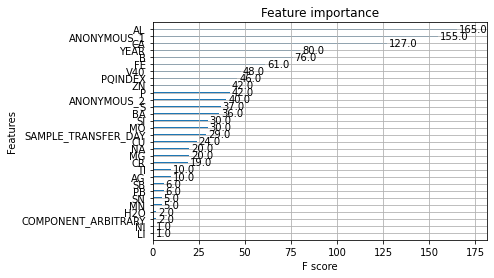

In [23]:
plot_importance(model)

In [7]:
# Xgboost 회귀분석 모델 GridCV로 최적 파리미터 탐색
xgb_reg = XGBRegressor()
parameters = {'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'subsample': [0.4, 0.6,0.8],
              'colsample_bytree': [0.2, 0.6, 0.8],
              'n_estimators': [500]}

xgb_grid = GridSearchCV(xgb_reg,
                        parameters,
                        cv = 3
                        )
x_train2, x_test2, y_train2, y_test2 = train_test_split(x_train[test_stage_features], y_reg, test_size=0.2)
xgb_grid.fit(x_train2,y_train2)

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=Non

In [28]:
# 최적 파라미터 출력
print(xgb_grid.best_params_)
print(xgb_grid.best_score_) 

{'colsample_bytree': 0.8, 'learning_rate': 0.03, 'max_depth': 5, 'min_child_weight': 4, 'n_estimators': 500, 'subsample': 0.8}
0.0867093247482772


In [33]:
# 최적 파라미터로 회귀분석에 학습 
model_reg = XGBRegressor(colsample_bytree= 0.8, learning_rate= 0.03, max_depth= 5, min_child_weight= 2, n_estimators= 500, nthread= 4, subsample= 0.8)
model_reg.fit(x_train2, y_train2, early_stopping_rounds=30, eval_metric='rmse', eval_set = [(x_test2, y_test2)])

[0]	validation_0-rmse:0.45142
[1]	validation_0-rmse:0.44051
[2]	validation_0-rmse:0.42987
[3]	validation_0-rmse:0.41961
[4]	validation_0-rmse:0.40971
[5]	validation_0-rmse:0.40015
[6]	validation_0-rmse:0.39089
[7]	validation_0-rmse:0.38205
[8]	validation_0-rmse:0.37356
[9]	validation_0-rmse:0.36535
[10]	validation_0-rmse:0.35744
[11]	validation_0-rmse:0.34984
[12]	validation_0-rmse:0.34257
[13]	validation_0-rmse:0.33553
[14]	validation_0-rmse:0.32873
[15]	validation_0-rmse:0.32217
[16]	validation_0-rmse:0.31589
[17]	validation_0-rmse:0.30998
[18]	validation_0-rmse:0.30415
[19]	validation_0-rmse:0.29866
[20]	validation_0-rmse:0.29335
[21]	validation_0-rmse:0.28828
[22]	validation_0-rmse:0.28345
[23]	validation_0-rmse:0.27878
[24]	validation_0-rmse:0.27433
[25]	validation_0-rmse:0.27001
[26]	validation_0-rmse:0.26591
[27]	validation_0-rmse:0.26195
[28]	validation_0-rmse:0.25820
[29]	validation_0-rmse:0.25458
[30]	validation_0-rmse:0.25113
[31]	validation_0-rmse:0.24789
[32]	validation_0-

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.03, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=5, max_leaves=0, min_child_weight=2, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=4, nthread=4,
             num_parallel_tree=1, predictor='auto', ...)

In [46]:
x_test2

,COMPONENT_ARBITRARY,ANONYMOUS_1,YEAR,ANONYMOUS_2,AG,CO,CR,CU,FE,H2O,MN,MO,NI,PQINDEX,TI,V,V40,ZN
13156,0,0.001242,6,-0.334887,-0.154394,-0.084743,-0.079138,-0.281087,-0.317028,-0.049548,-0.154103,1.247102,-0.189712,-0.265037,-0.098510,-0.107738,-0.245964,0.654421
2045,2,-0.267897,9,-0.334887,-0.154394,-0.084743,-0.114406,-0.281087,-0.152702,-0.049548,-0.154103,-0.403640,-0.189712,-0.157798,-0.098510,-0.107738,1.634847,-1.043114
3261,2,-0.315256,9,-0.334887,-0.154394,-0.084743,-0.079138,-0.246352,-0.093619,-0.049548,-0.154103,-0.403640,-0.189712,-0.257190,-0.098510,-0.107738,1.502330,-1.044992
12191,1,-0.166248,3,-0.334887,-0.154394,-0.084743,-0.114406,0.839116,-0.296718,-0.049548,-0.239120,-0.403640,-0.189712,-0.265690,-0.098510,-0.107738,-1.501388,0.256326
8472,0,-0.241098,7,1.605975,-0.154394,-0.084743,-0.079138,-0.272404,-0.311489,-0.049548,-0.239120,3.214653,-0.189712,-0.261113,-0.098510,-0.107738,0.105090,1.172695
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9628,2,0.000549,13,0.902790,-0.154394,-0.084743,0.061935,0.257305,0.203644,-0.049548,0.441017,-0.403640,-0.189712,-0.236265,-0.098510,-0.107738,0.776974,-1.011191
2284,0,-0.263738,7,-0.334887,-0.154394,-0.084743,-0.114406,-0.289771,-0.313336,-0.049548,-0.239120,-0.403640,-0.189712,-0.263729,-0.098510,-0.107738,-0.120422,1.033737
10568,1,-0.405816,2,-0.024136,-0.154394,-0.084743,-0.114406,-0.046626,-0.318875,1.103598,-0.239120,-0.403640,-0.189712,-0.264383,-0.098510,-0.107738,-1.247978,-0.387760
6799,1,0.361403,8,-0.334887,-0.154394,-0.084743,-0.114406,-0.272404,-0.322567,-0.049548,-0.239120,-0.403640,-0.189712,-0.266344,-0.098510,-0.107738,-0.992244,-0.579296


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

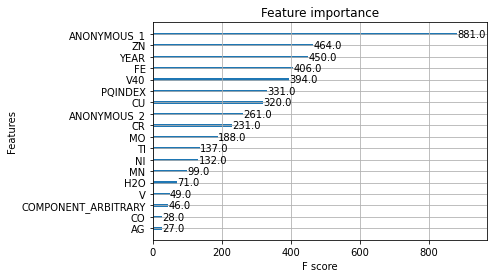

In [34]:
plot_importance(model_reg)

In [35]:
# 모델에 test데이터 적용

y_hat = model_reg.predict(df_test)

y_hat = pd.DataFrame(y_hat)
y_hat

,0
0,0.060589
1,0.080662
2,0.127054
3,0.104451
4,0.163888
...,...
6036,0.043190
6037,0.060893
6038,0.172004
6039,0.057461


In [45]:
submit = pd.read_csv("src/data/test.csv")
submit['Y_LABEL'] = y_hat

final_submit = pd.DataFrame()
final_submit['ID'] = submit['ID']
final_submit['Y_LABEL'] = y_hat


def get_reg(v):
  if v >= 0.355:
    score = 1
  else:
    score = 0
  return score

final_submit['Y_LABEL'] = final_submit['Y_LABEL'].apply(lambda v: get_reg(v))
final_submit

final_submit.to_csv('src/submit/submit9.csv', index=False)

In [44]:
final_submit['Y_LABEL'].sum()

33